# Creating a Times Series Hyper Feature of Google's Stock Price

## Refining 12 historical Financial Price Indicators into one time series hyper feature
>

*Authored by*
*Brandyn Ewanek*<br>
LinkedIn - [Personal Profile](https://www.linkedin.com/in/brandyn-ewanek-9733873b/)

[One on one time with Data Science Teacher Brandyn](https://www.datasimple.education/one-on-one-data-classes)

Follow <font size=4>*Data Science Teacher Brandyn*

[On Facebook](https://www.facebook.com/datascienceteacherbrandyn/ )

[On Linkedin](https://www.linkedin.com/company/data-science-teacher-brandyn)


<font size=5> *Project Objective*</font><br>

> Techincial indicatos have been used for 100s of years ago with the Japanese first using candle stick charting techniques to understand price movements.  There are now literally hundreds of not thousands of indicators.

> The <font size=5>goal of this project will be to determine if there is information in the historical price useful in stock prediction that can be extracted by a deep learning model using 14 common stock indicators (representation of historical price) and refining it into one Time Series Hyper Features for use in Meta model.</font>




<font size=5> *About the Data*<br>
<font size=4> Google Stock Historical Price DataFrame<br>

> >The google stock price dataset from Kaggle found [here](https://www.kaggle.com/datasets/varpit94/google-stock-data?select=GOOGL.csv).  Encompassed 2016-06-14 to 2021-1-30 time frame which overlap with the time frame for the collect Economic Data.



<font size=4>**Notes on Preprocessing of Data**<br></font>
+ <font size=3>**Engineering Indicators**<br></font>
  + MACD -MACD is calculated by subtracting the 26-day Exponential Moving Average (EMA) from the 12-day EMA.
  + Fast Stochastic Indicator - The Fast Stochastic oscillator is calculated by taking the current closing price minus the lowest low over a specific period, divided by the highest high minus the lowest low over the same period, and then multiplying the result by 100.
  + RSI - RSI (Relative Strength Index) is calculated by dividing the average of the upward price movements by the average of the downward price movements over a specified period, and then converting it to a value between 0 and 100.
  + The Money Flow Index (MFI) - is calculated by taking the typical price (average of high, low, and close) multiplied by the volume for a specific period, determining whether the price is up or down compared to the previous period, and then using these values to calculate the money flow ratio. The MFI is then derived from the money flow ratio and converted to a value between 0 and 100.
  + The Mass Index - is calculated by summing the exponential moving average of the double smoothed difference between high and low prices over a specified period, and then dividing it by the exponential moving average of the double smoothed difference over a longer period.

<font size=5>**Google Stock Price DataFrame**<br></font>

<font size=5> *About the Tools Used*<br></font>
<font size=4>**Python Libraries:**</font>
> + Pandas - data management
> + Numpy - needed for higher level mat functions
> + Seaborn - used in visualizations
> + matplotlib.pyplot - use in formatting visualization
> + warnings - used to supress warnings in ML libraries
> + GradientBoostingRegressor - ML model imported from sklearn
> + TensorFlow - to build neural network
> + train_test_split - from sklearn use to split into train and test data
> + StandardScaler - used in standardization of features
> + PCA - used in preprocessing the data
> +  seasonal_decompose from statsmodels.tsa.seasonal used to extract seasonal times series patterns
> + statsmodels.api used in time series analysis

<font size=4>**Notes on Inputs and Outputs**<br></font>
**Inputs**
> + 12 inputs of different representations of stock historical price
>  + Numerator Fast Stochastic
>  + Denominator Fast Stochastic
>  + Numerator Slow Stochastic
>  + Daily percentage Change
>  + Weekly Numerator Fast Stochastic
>  + Weekly Denominator Fast Stochastic
>  + Difference between Moving Averages of MACD
>  + Weekly Difference between Moving Averages of MACD
>  + RSI
>  + Difference between Moving Averages of MACD of volumne
>  + Mass Index
>  + Money Flow Index
**Outputs**
> + 4 representations of price, 1 main target
>  + Numerator Fast Stochastic **Main Target**
>  + Tomorrow's (Next Day) Numerator Fast Stochastic
>  + NDifference between Moving Averages of MACD
>  + RSI - Relative Strength Index

<font size=4>**How we evaluate model - Main Target **<br></font>
>Mean Absolute Error (MAE) is a metric used to evaluate the performance of a model by measuring the average absolute difference between the predicted and actual values, where a lower MAE indicates a better fit between the model's predictions and the true values.
> + Although our goal will be to get the best result on all 4 outputs we are mainly concerned with the output of the Numerator of the Fast Stochstic Indicator

<font size=5>**Summary of Results**</font>


> + Our Main Target the numerator of the fast stochastic finishes with a validation loss of 0.18, although small our target is on a scale from 0.0 to 1.0 so 0.18 represents an average error of 18% up or down from our target prediction. Although this shows signs of capturing some information it is obvious that the historical price of a stock alone will not be able to reliably predict the market.
> + In conclusion we were not able to predict the stock price with only the historical price, however it seems that we were able to capture some information but not explain fully the price movements. This gives hope that we will be able to use our Time Series Hyperfeatures created here in our Meta Model.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.preprocessing import PolynomialFeatures

# time series
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# deep learning
import tensorflow as tf

import warnings
warnings.simplefilter('ignore')
# Setting pandas options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# importing data</h2>


# Import old data

> Import data of the historical price of google stock from Brandyn's GitHub reservoir.
> + the features we will focus on is a percentage change of the closing price as our target
>  + to engineer the indicators, representations of price movement and volume, we will use close, high, low, open, and volume

In [ ]:
dfg = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/GOOG.csv') # import data

In [ ]:
dfg.shape # rows, columns

(1258, 14)

In [ ]:
dfg.head() # look at first 5 rows

In [ ]:
dfg.tail() # look at last 5 rows

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.00,2441.07,2451.32,1192453,2466.09,2468.00,2441.07,2451.32,1192453,0.00,1.00
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.49,2468.24,2479.90,1253253,2482.85,2494.49,2468.24,2479.90,1253253,0.00,1.00
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.00,2487.33,2499.50,1006337,2491.40,2505.00,2487.33,2499.50,1006337,0.00,1.00
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.26,2494.00,2494.01,1561733,2521.60,2523.26,2494.00,2494.01,1561733,0.00,1.00
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.99,2498.29,2524.92,1262309,2513.93,2526.99,2498.29,2524.92,1262309,0.00,1.00


# Preprocessing

## day high low

In [ ]:
df['day_low'] = df[['open', 'close', 'low']].min(axis=1) # engineer day's low feature by getting min across row

In [ ]:
# engineer day's min of the last 14 days feature by getting min of a window time step window
df['14day_low'] = df['day_low'].rolling(14).min()

In [ ]:
df['day_high'] = df[['open', 'close', 'high']].max(axis=1) # engineer day's low feature by getting min across row

In [ ]:
# engineer day's max of the last 14 days feature by getting min of a window time step window
df['14day_high'] = df['day_high'].rolling(14).max()

## Engineering time features

## Engineering pct_change features

In [ ]:
# create percentage change change feature
f['close_pct_change'] = df['close'].pct_change()

In [ ]:
df[['close','close_pct_change']].head() # first value null from percentage change formula

,close,close_pct_change
0,718.27,NaN
1,718.92,0.00
2,710.36,-0.01
3,691.72,-0.03
4,693.71,0.00


# Indicator Development

## Fast/Slow Stochastic

The fast stochastic indicator is an oscillator category of indicators.  To read more about the stochastic indicator [here](https://en.wikipedia.org/wiki/Stochastic_oscillator)

In [ ]:
# K of fast
df['fast_k'] = (df['close'] - df['14day_low']) / \
                                        (df['14day_high'] - df['14day_low'] ) # create numerator of fast stochastic indicator

In [ ]:
# D of fast
df['fast_d'] = df['fast_k'].rolling(3).mean() # create denominator of the fast stochastic

In [ ]:
# K of slow
df['slow_k'] = df['fast_d'].rolling(3).mean()

In [ ]:
# D of slow
df['slow_d'] = df['slow_k'].rolling(3).mean()

## Weekly fast_k

In [ ]:
df['14week_high'] = df['day_high'].rolling(14*5).max() #14 weeks of 5 days max high price

In [ ]:
df['14week_low'] = df['day_low'].rolling(14*5).min()#14 weeks of 5 days min low price

In [ ]:
df['fast_k_weekly'] = (df['close'] - df['14week_high']) / \
                                        (df['14week_high'] - df['14week_low'] ) # calculate the numerator of the fast stochastic

In [ ]:
# D of fast
df['fast_d_weekly'] = df['fast_k_weekly'].rolling(3).mean() # calculate the denomintor of the fast stochastic

## Weekly slow_k

In [ ]:
# K of slow
df['slow_k_weekly'] = df['fast_d_weekly'].rolling(3).mean() # calculate the numerator of the slow stochastic

In [ ]:
df['slow_d_weekly'] = df['slow_k_weekly'].rolling(3).mean() # calculate the denomintor of the slow stochastic

## MACD

In [ ]:
df['ema_12'] = df['close'].ewm(span=12).mean() # 12 day exponential moving average
df['ema_26'] = df['close'].ewm(span=26).mean() # 26 day exponential moving average

In [ ]:
df['MACD'] = df['ema_12'] - df['ema_26'] # calculate the macd first line

In [ ]:
df['slow_MACD'] = df['MACD'].ewm(span=9).mean() # calculate the macd second line

In [ ]:
df['diff_MACD'] = df['MACD'] - df['slow_MACD'] # calculate the difference between the two lines

## Weekly MACD

In [ ]:
df['ema_12_weekly'] = df['close'].ewm(span=12*5).mean() # 12 week exponential moving average
df['ema_26_weekly'] = df['close'].ewm(span=26*5).mean() # 26 week exponential moving average

In [ ]:
df['MACD_weekly'] = df['ema_12_weekly'] - df['ema_26_weekly'] # the difference creates the first macd line

In [ ]:
df['slow_MACD_weekly'] = df['MACD_weekly'].ewm(span=9).mean() # the 2nd component of the MACD formula

In [ ]:
df['diff_MACD_weekly'] = df['MACD_weekly'] - df['slow_MACD_weekly'] # the stationary difference between these two indicators

## RSI

In [ ]:
change = df['close'].diff(1) # difference in closing price
df['Gain'] = change.mask(change<0,0) # filtering only positive changes
df['Loss'] = abs(change.mask(change>0,0)) # filtering only negative changes
df['AVG_Gain'] = df['Gain'].rolling(14).mean() # rolling 14 day average
df['AVG_Loss'] = df['Loss'].rolling(14).mean() # rolling 14 day average
df['RS'] = df['AVG_Gain']/df['AVG_Loss'] # average 14 day gain divided by 14 day loss to get relative strength
df['rsi'] = 100 - (100/(1+df['RS'])) # create an index of the relative strength

## Volume - MACD representation

In [ ]:
df['vol_12'] = df['volume'].ewm(span=12).mean() # 12 exponential moving average
df['vol_26'] = df['volume'].ewm(span=26).mean() # 26 exponential moving average

In [ ]:
df['fast_vol_macd'] = df['vol_12'] - df['vol_26'] # difference for 1st line of the Macd indicator

In [ ]:
df['slow_vol_macd'] = df['fast_vol_macd'].ewm(span=9).mean() # exponential moving average of 1st line for 2nd line

In [ ]:
df['macd_vol'] = df['fast_vol_macd'] - df['slow_vol_macd'] # take the difference of the 2 lines for the stationary feature

## MassIndex

In [ ]:
df['ema9_hl'] = (df['high'] - df['low']).ewm(span=9).mean() # 9 days exponential weighted average

In [ ]:
df['ema9_9_hl'] = df['ema9_hl'].ewm(span=9).mean() # the 9 exponential average of the ema

In [ ]:
df['massind'] = (df['ema9_hl']/df['ema9_9_hl']).rolling(25).sum() # dividing the 2 values sumed over 25days

## Money Flow Index

In [ ]:
df['typicalprice'] = (df['high'] + df['low'] + df['close']) / 3 # calculate typical price by summming high low and close price

In [ ]:
df['rawmoneyflow'] = df['typicalprice'] + df['volume'] # add in volume

In [ ]:
change = df['rawmoneyflow'].diff(1) # get daily change
df['Gainmf'] = change.mask(change>0,0) # positive daily changes
df['Lossmf'] = abs(change.mask(change<0,0)) # negative daily changes
df['AVG_Gainmf'] = df.Gain.rolling(14).sum() # 14 day average gain
df['AVG_Lossmf'] = df.Loss.rolling(14).sum() # 14 day average loss
df['moneyratio'] = df['AVG_Gainmf']/df['AVG_Lossmf'] # calculate money ratio 14 day gain / loss
df['mf_index'] = 100 - (100/(1+df['moneyratio'])) # turn money ratio into index

# Time series train test split

here we complete a train test split where older rows are used as the training and newer rows are used as the test split.

With engineering indicators and then engineering lagged features from those creates rows with null values until row 134 and so we start train sampling from row 135.

In [ ]:

train_start_ind = 135
train_end_ind = 1000
val_start_ind = 799
val_end_ind = 800
test_start_ind = 1000
test_end_ind = 1200




In [ ]:
df.tail(2)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,day_low,14day_low,day_high,14day_high,close_pct_change,fast_k,fast_d,slow_k,slow_d,fast_k_pct_change,up_down_fast_k,14week_high,14week_low,fast_k_weekly,fast_d_weekly,slow_k_weekly,slow_d_weekly,ema_12,ema_26,MACD,slow_MACD,diff_MACD,ema_12_weekly,ema_26_weekly,MACD_weekly,slow_MACD_weekly,diff_MACD_weekly,Gain,Loss,AVG_Gain,AVG_Loss,RS,rsi,vol_12,vol_26,fast_vol_macd,slow_vol_macd,macd_vol,ema9_hl,ema9_9_hl,massind,typicalprice,rawmoneyflow,Gainmf,Lossmf,AVG_Gainmf,AVG_Lossmf,moneyratio,mf_index,fast_k_1daysago,fast_k_2daysago,fast_k_3daysago,fast_k_5daysago,fast_k_7daysago,fast_k_8daysago,fast_k_10daysago,fast_k_12daysago,fast_k_13daysago,fast_k_15daysago,fast_k_17daysago,fast_k_18daysago,fast_k_20daysago,fast_k_22daysago,fast_k_23daysago,fast_k_25daysago,fast_k_27daysago,fast_k_28daysago,fast_k_30daysago,fast_k_32daysago,fast_k_33daysago,fast_k_35daysago,fast_k_37daysago,fast_k_38daysago,fast_k_40daysago,fast_k_42daysago,fast_k_43daysago,fast_k_45daysago,fast_k_47daysago,fast_k_48daysago,fast_k_50daysago,fast_k_52daysago,fast_k_53daysago,fast_k_55daysago,fast_k_57daysago,fast_k_58daysago,fast_k_60daysago,fast_d_1daysago,fast_d_2daysago,fast_d_3daysago,fast_d_5daysago,fast_d_7daysago,fast_d_8daysago,fast_d_10daysago,fast_d_12daysago,fast_d_13daysago,fast_d_15daysago,fast_d_17daysago,fast_d_18daysago,fast_d_20daysago,fast_d_22daysago,fast_d_23daysago,fast_d_25daysago,fast_d_27daysago,fast_d_28daysago,fast_d_30daysago,fast_d_32daysago,fast_d_33daysago,fast_d_35daysago,fast_d_37daysago,fast_d_38daysago,fast_d_40daysago,fast_d_42daysago,fast_d_43daysago,fast_d_45daysago,fast_d_47daysago,fast_d_48daysago,fast_d_50daysago,fast_d_52daysago,fast_d_53daysago,fast_d_55daysago,fast_d_57daysago,fast_d_58daysago,fast_d_60daysago,slow_k_1daysago,slow_k_2daysago,slow_k_3daysago,slow_k_5daysago,slow_k_7daysago,slow_k_8daysago,slow_k_10daysago,slow_k_12daysago,slow_k_13daysago,slow_k_15daysago,slow_k_17daysago,slow_k_18daysago,slow_k_20daysago,slow_k_22daysago,slow_k_23daysago,slow_k_25daysago,slow_k_27daysago,slow_k_28daysago,slow_k_30daysago,slow_k_32daysago,slow_k_33daysago,slow_k_35daysago,slow_k_37daysago,slow_k_38daysago,slow_k_40daysago,slow_k_42daysago,slow_k_43daysago,slow_k_45daysago,slow_k_47daysago,slow_k_48daysago,slow_k_50daysago,slow_k_52daysago,slow_k_53daysago,slow_k_55daysago,slow_k_57daysago,slow_k_58daysago,slow_k_60daysago,close_pct_change_1daysago,close_pct_change_2daysago,close_pct_change_4daysago,close_pct_change_5daysago,close_pct_change_6daysago,close_pct_change_9daysago,close_pct_change_10daysago,close_pct_change_11daysago,close_pct_change_14daysago,close_pct_change_15daysago,close_pct_change_16daysago,close_pct_change_19daysago,close_pct_change_30daysago,close_pct_change_31daysago,close_pct_change_34daysago,close_pct_change_35daysago,close_pct_change_36daysago,close_pct_change_39daysago,close_pct_change_40daysago,close_pct_change_41daysago,close_pct_change_44daysago,close_pct_change_45daysago,close_pct_change_46daysago,close_pct_change_49daysago,close_pct_change_50daysago,close_pct_change_51daysago,close_pct_change_54daysago,close_pct_change_55daysago,close_pct_change_56daysago,close_pct_change_59daysago,close_pct_change_60daysago,diff_MACD_1daysago,diff_MACD_4daysago,diff_MACD_5daysago,diff_MACD_6daysago,diff_MACD_9daysago,diff_MACD_10daysago,diff_MACD_11daysago,diff_MACD_14daysago,diff_MACD_15daysago,diff_MACD_16daysago,diff_MACD_19daysago,diff_MACD_30daysago,diff_MACD_31daysago,diff_MACD_34daysago,diff_MACD_35daysago,diff_MACD_36daysago,diff_MACD_39daysago,diff_MACD_40daysago,diff_MACD_41daysago,diff_MACD_44daysago,diff_MACD_45daysago,diff_MACD_46daysago,diff_MACD_49daysago,diff_MACD_50daysago,diff_MACD_51daysago,diff_MACD_54daysago,diff_MACD_55daysago,diff_MACD_56daysago,diff_MACD_59daysago,diff_MACD_60daysago,rsi_1daysago,rsi_2daysago,rsi_3daysago,rsi_5daysago,rsi_7daysago,rsi_8daysago,rsi_10daysago,rsi_12day

In [ ]:
# train, validation, test split by index place
df_train = df[train_start_ind:train_end_ind]
df_test = df[test_start_ind:]


In [ ]:
df_train.shape

(865, 440)

In [ ]:
df_test.shape

# Time Series Analysis

Using seasonal_decomposition in statsmdodel to perform seasonal decompsition, we will then focus on the seasonality component in a hunt for which of the past days of each indicator are correlate with today.

An important consideration in the seasonal decomposition is that we will be assuming a 5 day frequency or period of seasonality.  This is in line with the theory of weekly patterns from Monday to Friday in the stock market based around human behaviour.

 + **Any choice in the time frequency will add consideration bias to the days found with high seasonal autocorrelation. Other choices could reasonable be 15 and 30 days based around a monthly cycle in the stock market**

Seasonal decomposition is a statistical technique used to break down a time series into its underlying components: trend, seasonality, and residual (or error) components. Each component represents a different pattern or source of variation in the data.

Here's a brief explanation of each component:

Trend: The trend component represents the long-term pattern or direction of the data. It captures the overall upward or downward movement in the series. For example, if you have sales data over several years, the trend component would indicate whether sales are increasing or decreasing over time.

Seasonality: The seasonal component captures the recurring patterns or cycles within the data. It represents the regular fluctuations that occur at fixed intervals, such as daily, weekly, monthly, or yearly patterns. For example, if you have monthly sales data, the seasonal component would reveal any consistent monthly patterns in sales.

Residual (or Error): The residual component represents the random or unpredictable part of the data that cannot be explained by the trend or seasonal patterns. It includes any short-term fluctuations, noise, or irregularities in the data.

By decomposing a time series into these components, you can gain insights into the underlying patterns and better understand the data. This decomposition allows you to analyze and model each component separately, which can be useful for various purposes such as forecasting, anomaly detection, and identifying the impact of different factors on the data.

## Close

In [ ]:
df_seas_compon = seasonal_decompose(df_train['close'],\
                                    model='additive', freq = 5)

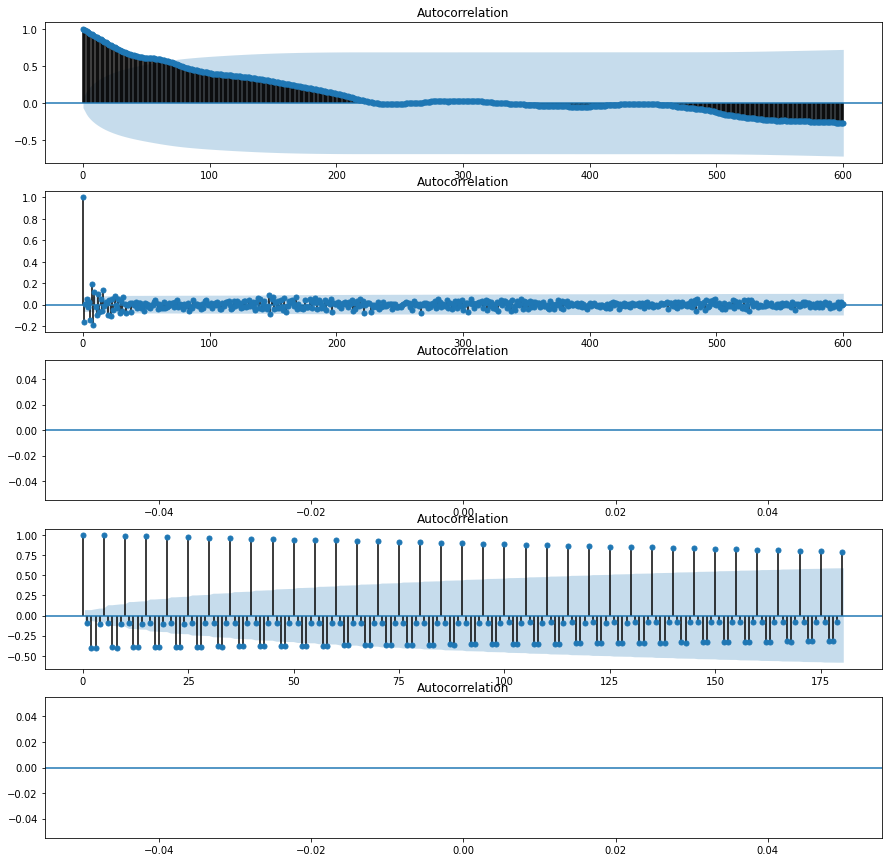

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,4))

sm.graphics.tsa.plot_acf(df_seas_compon.seasonal.values.squeeze(), lags=180, ax=ax[3])

plt.show()

## Close pct_change

In [ ]:
df_seas_compon_close_pct_change = seasonal_decompose(df_train['close_pct_change'],\
                                    model='additive', freq = 5)

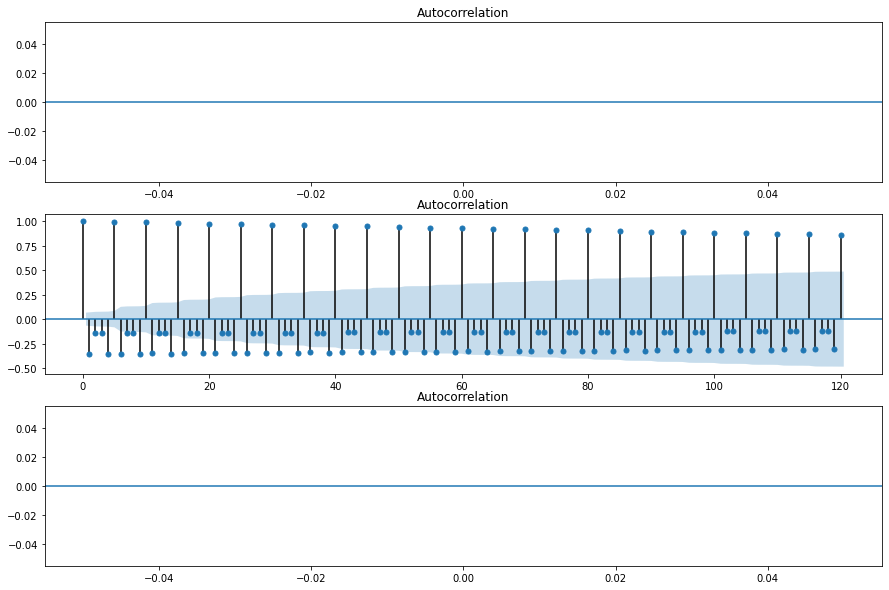

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,4))
sm.graphics.tsa.plot_acf(df_seas_compon_close_pct_change.seasonal.values.squeeze(), lags=120, ax=ax[1])
plt.show()

## fast_k

In [ ]:
df_seas_compon_fast_k = seasonal_decompose(df_train['fast_k'], #train_end_ind\
                                    model='additive', freq = 5)

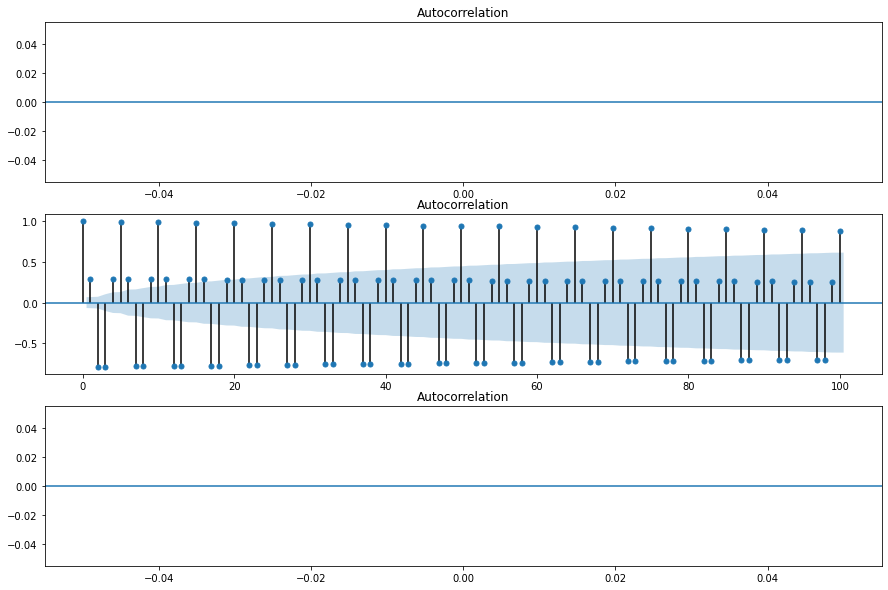

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## fast_d

In [ ]:
df_seas_compon_fast_d = seasonal_decompose(df_train['fast_d'],\
                                    model='additive', freq = 5)

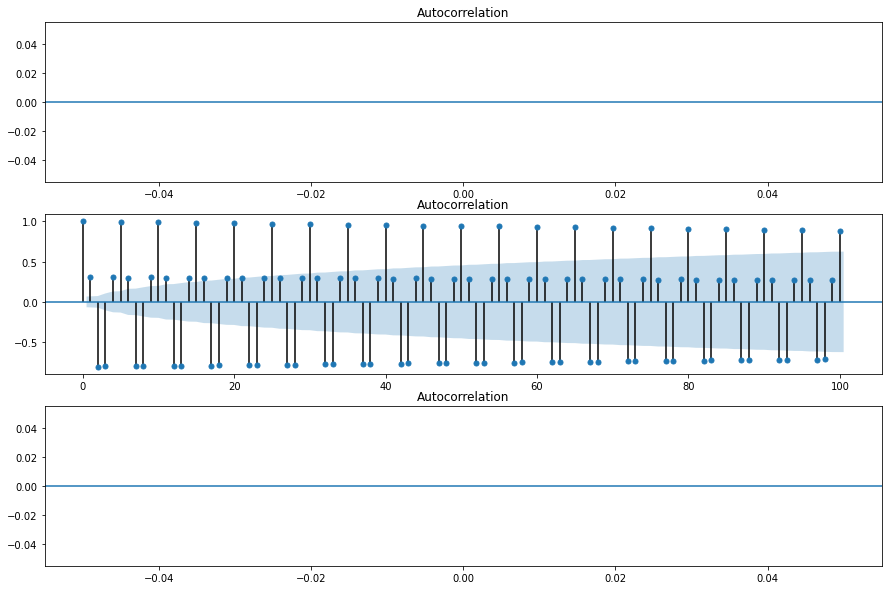

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## slow_k

In [ ]:
df_seas_compon_slow_k = seasonal_decompose(df_train['slow_k'],\
                                    model='additive', freq = 5)

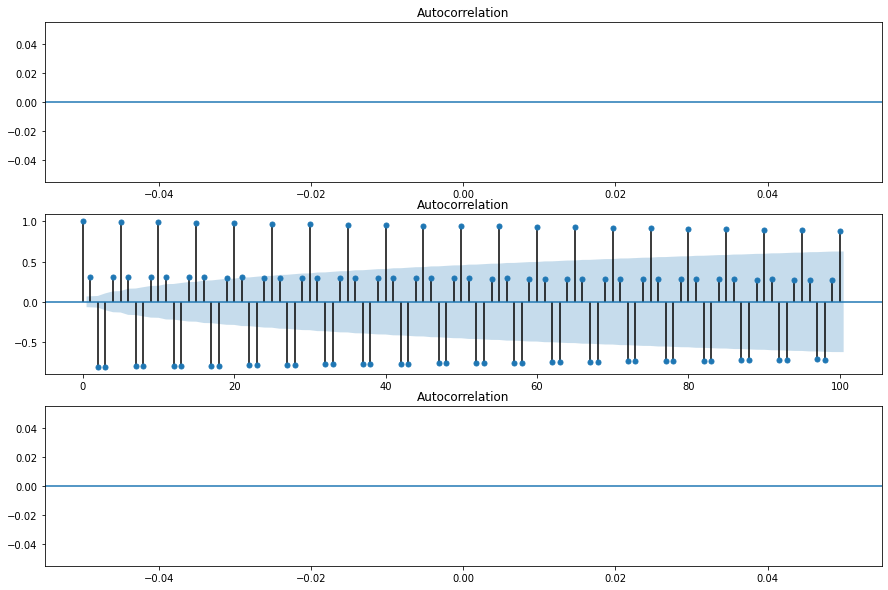

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,4))
sm.graphics.tsa.plot_acf(df_seas_compon_slow_k.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## slow_d

In [ ]:
df_seas_compon_slow_d = seasonal_decompose(df_train['slow_d'],\
                                    model='additive', freq = 5)

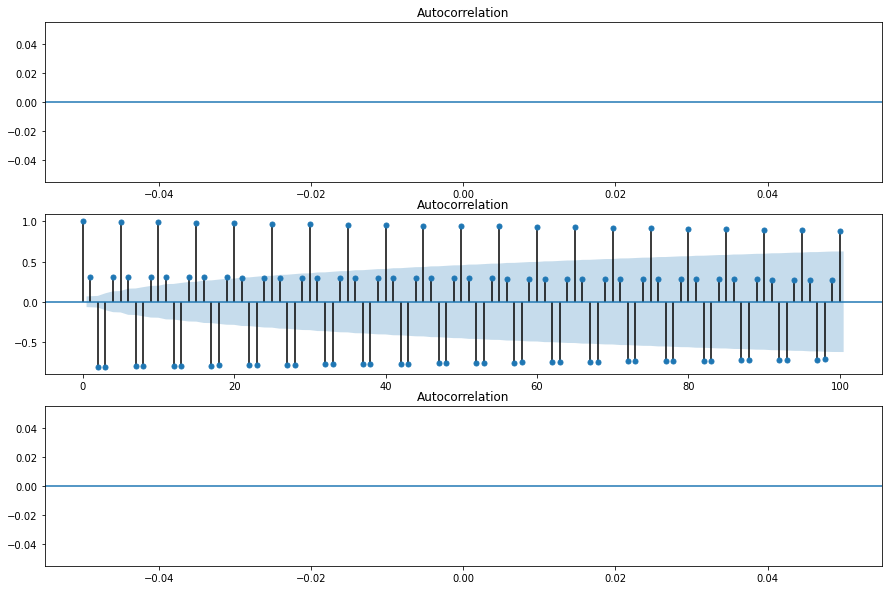

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_slow_d.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## fast_k_weekly

In [ ]:
df_seas_compon_fast_k_weekly = seasonal_decompose(df_train['fast_k_weekly'],\
                                    model='additive', freq = 6)

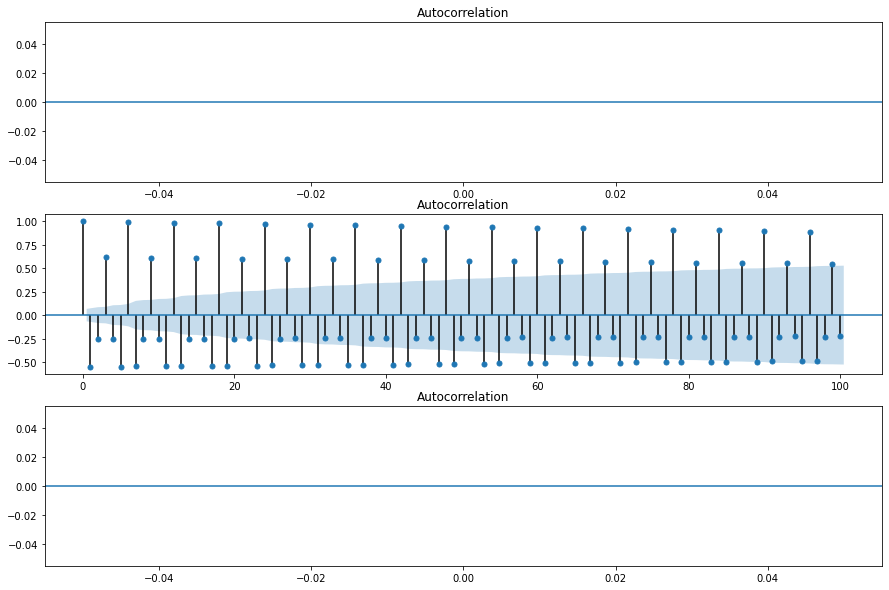

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_k_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## fast_d_weekly

In [ ]:
df_seas_compon_fast_d_weekly = seasonal_decompose(df_train['fast_d_weekly'],\
                                    model='additive', freq = 5)

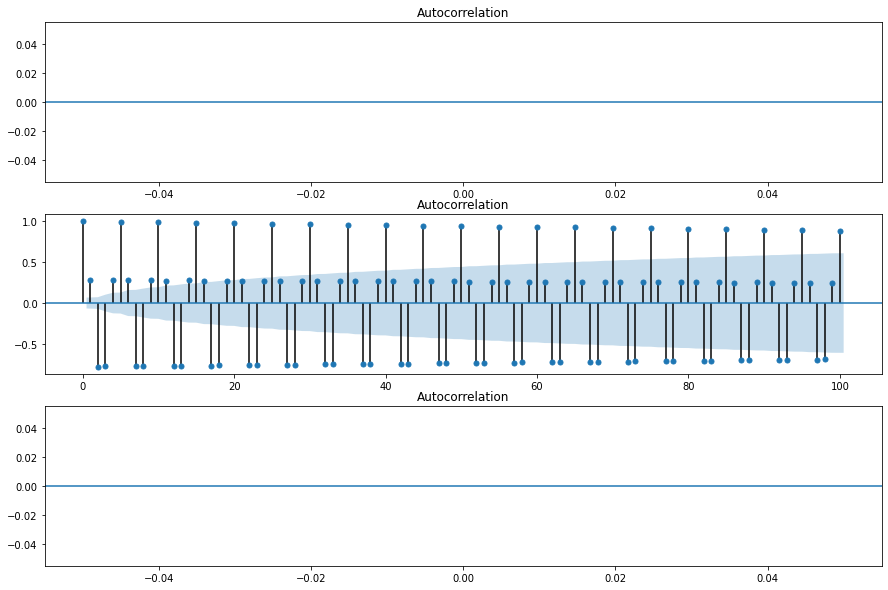

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_fast_d_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])

plt.show()

## diff_MACD

In [ ]:
df_seas_compon_diff_macd = seasonal_decompose(df_train['diff_MACD'],\
                                    model='additive', freq = 5)

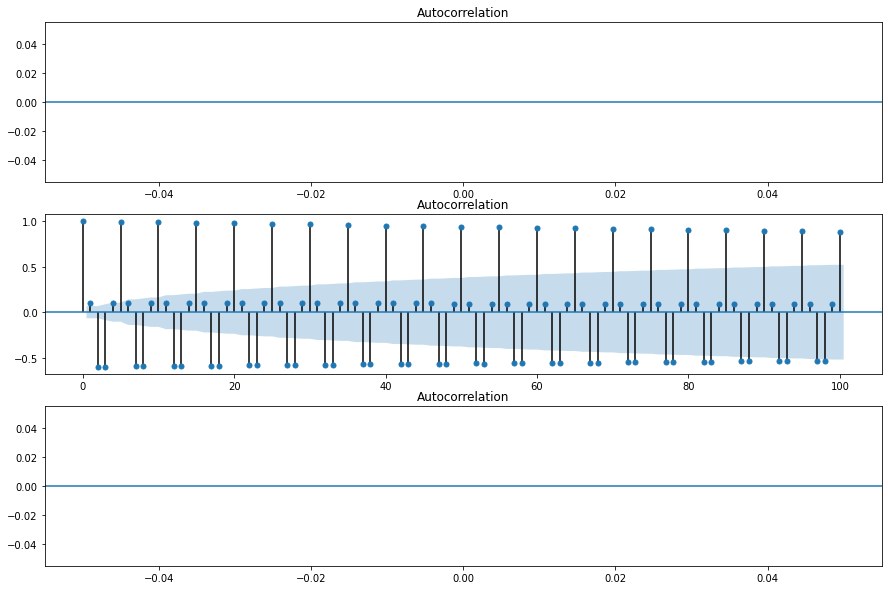

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

In [ ]:
df_seas_compon_macd = seasonal_decompose(df_train['MACD'][26:train_end_ind],\
                                    model='additive', freq = 5)

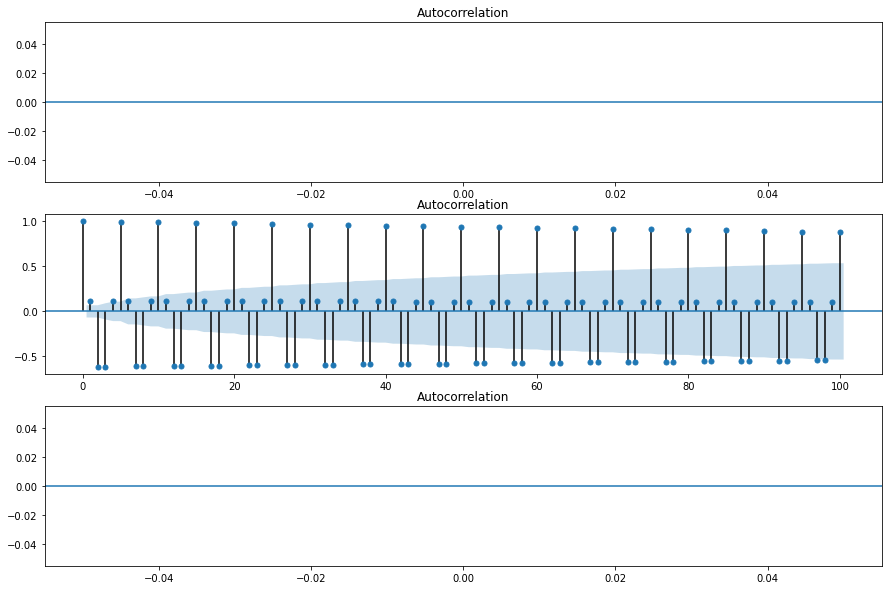

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_macd.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()

## MACD_weekly

In [ ]:
df_seas_compon_diff_macd_weekly = seasonal_decompose(df_train['diff_MACD_weekly'],\
                                    model='additive', freq = 5)

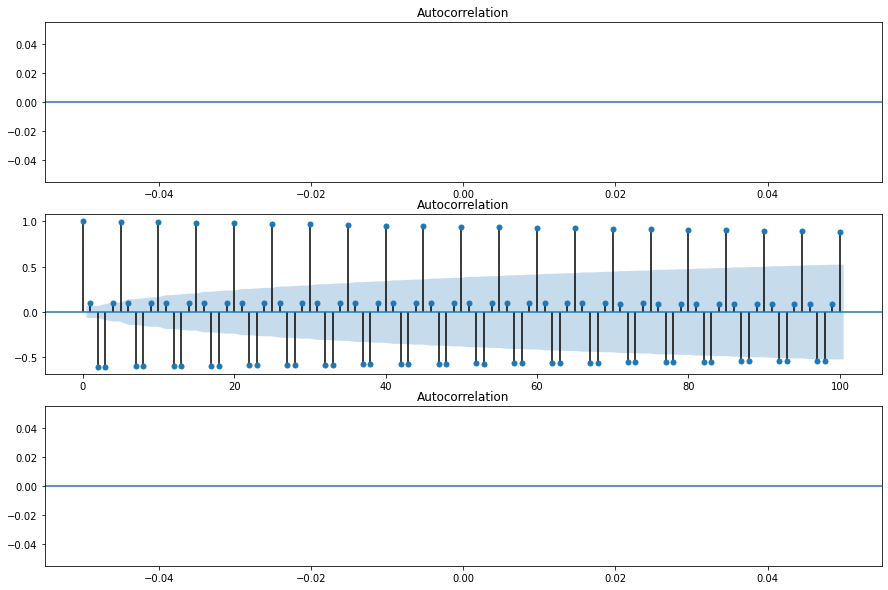

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_diff_macd_weekly.seasonal.values.squeeze(), lags=100, ax=ax[1])
plt.show()


## RSI

In [ ]:
df_seas_compon_rsi = seasonal_decompose(df_train['rsi'],\
                                    model='additive', freq = 15)

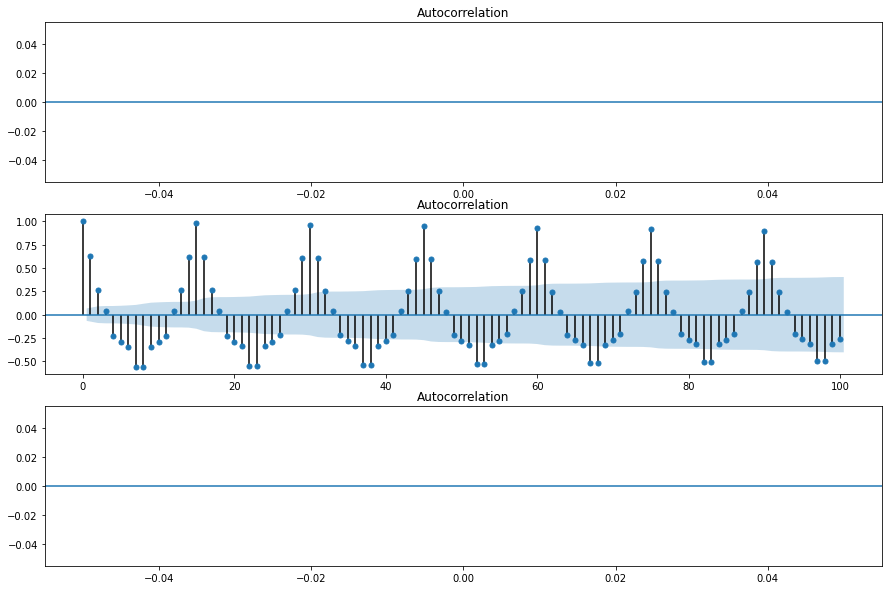

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_rsi.seasonal.values.squeeze(), lags=100, ax=ax[1])

plt.show()

## Volume

In [ ]:
df_seas_compon_macd_vol = seasonal_decompose(df_train['macd_vol'],\
                                    model='additive', freq = 5)

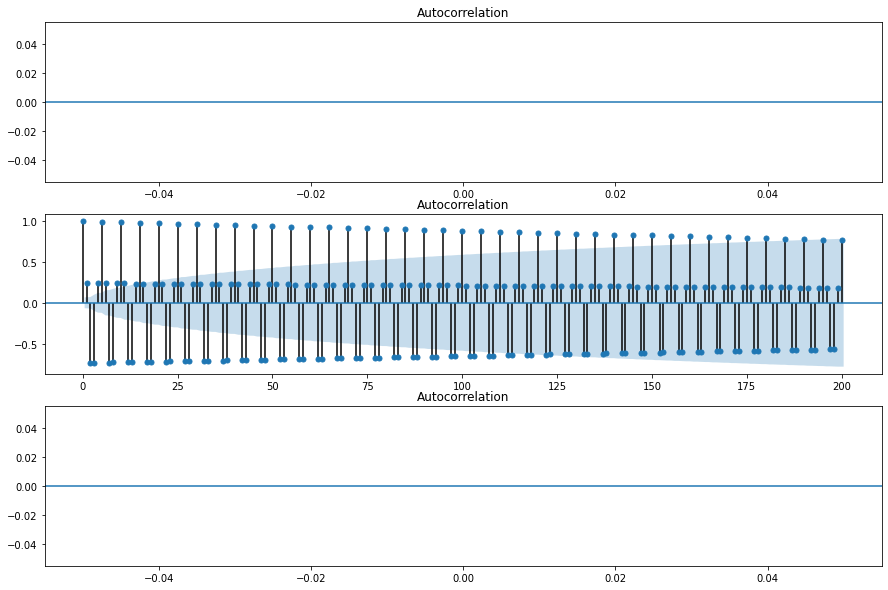

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_macd_vol.seasonal.values.squeeze(), lags=200, ax=ax[1])
plt.show()

## Mass Index

In [ ]:
df_seas_compon_massind = seasonal_decompose(df_train['massind'],\
                                    model='additive', freq = 5)

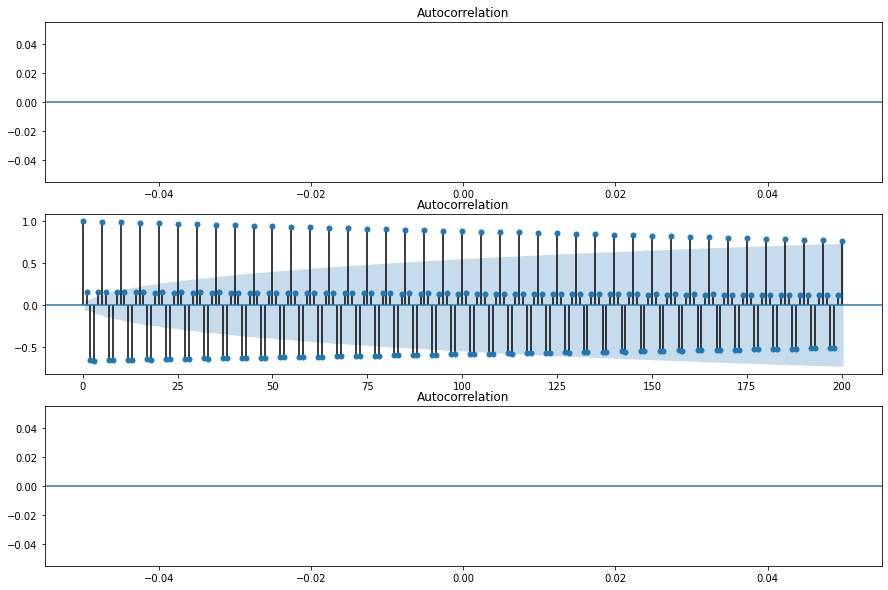

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_massind.seasonal.values.squeeze(), lags=200, ax=ax[1])

plt.show()

## Money Flow Index

In [ ]:
df_seas_compon_mf_index = seasonal_decompose(df_train['mf_index'],\
                                    model='additive', freq = 5)

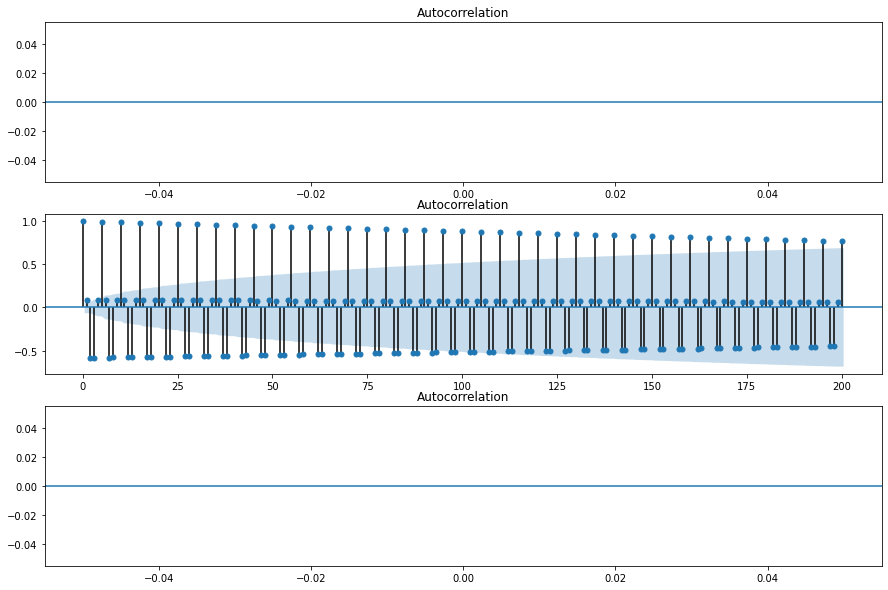

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_seas_compon_mf_index.seasonal.values.squeeze(), lags=200, ax=ax[1])

plt.show()

# Engineering time features

An important step in creating a time series hyper feature is that we need to choose which of the past days we will use.  We could just choose the last 60 days and let the model choose which were import as neurons turned off.  This runs the risk of confusing and overwhelming our model as we have 14 representations of price and volume movements in the form of different stock indicators.

We used seasonal decomposition to reduce the number of days and focus the creation of our time series hyperfeature from only the highly correlated past days as the less correlated days will overwhelm the model with irrelevant data.

In the following section we will shift the desired column by one time step, one day, for each value in the list of selected days from in the seasonal decomposition section above.

We choose to limit the days into to the past to up to 60 business days into the past. A repeating pattern of days are choosen up to 60 days in the past.


In [ ]:
# business days in the past
# numerator of fast stochastic
periods_fast_k = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
# denominator of the fast stochastic
periods_fast_d = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
# numerator of the slow stochastic
periods_slow_k = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
# percentage change factored up of 100
periods_pct_change = [1,2,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
#  the difference between the moving averages in the MACD indicator
periods_macd_diff = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
# relative strength indicator
periods_rsi = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
# 12 period exponential moving average
periods_ema_12 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# 26 period exponential moving average
periods_ema_26 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# weekly fast stochastic numerator
periods_fast_k_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
# weekly fast stochastic denominator
periods_fast_d_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
# #  the difference between the weekly moving averages in the MACD indicator
periods_macd_diff_weekly = [1,6,11,16,18,21,26,31,36,41,46,51,56]
periods_macd_vol = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_massind = [1,2,3,5,7,8,10,12,13,15,17,18,20,22,23,25,27,28,30,32,33,35,37,38,40,42,43,45,47,48,50,52,53,55,57,58,60]
periods_mf_index = [1,4,5,6,9,10,11,14,15,16,19,30,31,34,35,36,39,40,41,44,45,46,49,50,51,54,55,56,59,60]
periods_fast_k_tomorrow = [-1]
features_time = [('fast_k', periods_fast_k), ('fast_d', periods_fast_d), ('slow_k',periods_slow_k),
                 ('close_pct_change', periods_pct_change),('diff_MACD',periods_macd_diff), ('rsi', periods_rsi),
                ( 'ema_12', periods_ema_12), ('ema_26',periods_ema_26), ('fast_k_weekly',periods_fast_k_weekly),
                 ('fast_d_weekly',periods_fast_d_weekly), ('diff_MACD_weekly',periods_macd_diff_weekly),
                 ('macd_vol',periods_macd_vol), ('massind', periods_massind),
                 ('mf_index', periods_mf_index), #('ulcer_index', periods_ulcer_index),
                 ('fast_k', periods_fast_k_tomorrow)]


In [ ]:
# simple function to shift the rows, bring past into future
def historical_features(df, feature='fast_k', periods=[1,2,3]):
    for period in periods: # loop through provide list of periods
        df[f"{feature}_{period}daysago"] = df[feature].shift(period) # shift by period and create new feature
    return df

In [ ]:
# loop through periods and engineer time lag features
for i, (feat, period) in enumerate(features_time):
  df = historical_features(df, feature=feat, periods=period)

In [ ]:
df.shape

(1258, 439)

In [ ]:
df[['fast_k','fast_k_2daysago', 'fast_k_3daysago', 'fast_k_5daysago',
            'close_pct_change', 'close_pct_change_1daysago', 'close_pct_change_2daysago'
            ]][14:30].head(10)

,fast_k,fast_k_2daysago,fast_k_3daysago,fast_k_5daysago,close_pct_change,close_pct_change_1daysago,close_pct_change_2daysago
14,0.52,NaN,NaN,NaN,-0.01,0.01,0.01
15,0.65,0.60,NaN,NaN,0.00,-0.01,0.01
16,0.70,0.52,0.60,NaN,-0.00,0.00,-0.01
17,1.00,0.65,0.52,NaN,0.01,-0.00,0.00
18,0.97,0.70,0.65,0.60,0.01,0.01,-0.00
19,0.96,1.00,0.70,0.52,0.01,0.01,0.01
20,0.88,0.97,1.00,0.65,-0.01,0.01,0.01
21,0.95,0.96,0.97,0.70,0.01,-0.01,0.01
22,0.91,0.88,0.96,1.00,-0.00,0.01,-0.01
23,0.96,0.95,0.88,0.97,0.02,-0.00,0.01


# Feature Selection

In [ ]:
df_train.columns[420:490]

Index(['mf_index_31daysago', 'mf_index_34daysago', 'mf_index_35daysago',
       'mf_index_36daysago', 'mf_index_39daysago', 'mf_index_40daysago',
       'mf_index_41daysago', 'mf_index_44daysago', 'mf_index_45daysago',
       'mf_index_46daysago', 'mf_index_49daysago', 'mf_index_50daysago',
       'mf_index_51daysago', 'mf_index_54daysago', 'mf_index_55daysago',
       'mf_index_56daysago', 'mf_index_59daysago', 'mf_index_60daysago',
       'fast_k_-1daysago', 'intercept_1'],
      dtype='object')

In [ ]:
# numerator of the fast stochastic indicator
features_fast_k = ['fast_k_1daysago',
        'fast_k_2daysago', 'fast_k_3daysago', 'fast_k_5daysago',
        'fast_k_7daysago', 'fast_k_8daysago', 'fast_k_10daysago',
        'fast_k_12daysago', 'fast_k_13daysago','fast_k_15daysago',
        'fast_k_17daysago', 'fast_k_18daysago',
        'fast_k_20daysago', 'fast_k_22daysago', 'fast_k_23daysago',
        'fast_k_25daysago', 'fast_k_27daysago', 'fast_k_28daysago',
        'fast_k_30daysago', 'fast_k_32daysago', 'fast_k_33daysago',
        'fast_k_35daysago', 'fast_k_37daysago', 'fast_k_38daysago',
        'fast_k_40daysago', 'fast_k_42daysago', 'fast_k_43daysago',
        'fast_k_45daysago', 'fast_k_47daysago', 'fast_k_48daysago',
        'fast_k_50daysago', 'fast_k_52daysago', 'fast_k_53daysago',
        'fast_k_55daysago', 'fast_k_57daysago', 'fast_k_58daysago',
        'fast_k_60daysago']
# denominator of the fast stochastic indicator
features_fast_d=['fast_d_1daysago', 'fast_d_2daysago',
        'fast_d_3daysago', 'fast_d_5daysago', 'fast_d_7daysago',
        'fast_d_8daysago', 'fast_d_10daysago', 'fast_d_12daysago',
        'fast_d_13daysago', 'fast_d_15daysago', 'fast_d_17daysago',
        'fast_d_18daysago', 'fast_d_20daysago', 'fast_d_22daysago',
        'fast_d_23daysago', 'fast_d_25daysago', 'fast_d_27daysago',
        'fast_d_28daysago', 'fast_d_30daysago', 'fast_d_32daysago',
        'fast_d_33daysago', 'fast_d_35daysago', 'fast_d_37daysago',
        'fast_d_38daysago', 'fast_d_40daysago', 'fast_d_42daysago',
        'fast_d_43daysago', 'fast_d_45daysago', 'fast_d_47daysago',
        'fast_d_48daysago', 'fast_d_50daysago', 'fast_d_52daysago',
        'fast_d_53daysago', 'fast_d_55daysago', 'fast_d_57daysago',
        'fast_d_58daysago', 'fast_d_60daysago']
# numerator of the slow stochastic indicator
features_slow_k=[ 'slow_k_1daysago',
        'slow_k_2daysago', 'slow_k_3daysago', 'slow_k_5daysago',
        'slow_k_7daysago', 'slow_k_8daysago', 'slow_k_10daysago',
        'slow_k_12daysago', 'slow_k_13daysago', 'slow_k_15daysago',
        'slow_k_17daysago', 'slow_k_18daysago', 'slow_k_20daysago',
        'slow_k_22daysago', 'slow_k_23daysago', 'slow_k_25daysago',
        'slow_k_27daysago', 'slow_k_28daysago', 'slow_k_30daysago',
        'slow_k_32daysago', 'slow_k_33daysago', 'slow_k_35daysago',
        'slow_k_37daysago', 'slow_k_38daysago', 'slow_k_40daysago',
        'slow_k_42daysago', 'slow_k_43daysago', 'slow_k_45daysago',
        'slow_k_47daysago', 'slow_k_48daysago', 'slow_k_50daysago',
        'slow_k_52daysago', 'slow_k_53daysago', 'slow_k_55daysago',
        'slow_k_57daysago', 'slow_k_58daysago', 'slow_k_60daysago']
# percentage change features
features_pct_change= [ 'close_pct_change_1daysago', 'close_pct_change_2daysago',
        'close_pct_change_4daysago', 'close_pct_change_5daysago',
        'close_pct_change_6daysago', 'close_pct_change_9daysago',
        'close_pct_change_10daysago', 'close_pct_change_11daysago',
        'close_pct_change_14daysago', 'close_pct_change_15daysago',
        'close_pct_change_16daysago', 'close_pct_change_19daysago',
        'close_pct_change_30daysago', 'close_pct_change_31daysago',
        'close_pct_change_34daysago', 'close_pct_change_35daysago',
        'close_pct_change_36daysago', 'close_pct_change_39daysago',
        'close_pct_change_40daysago', 'close_pct_change_41daysago',
        'close_pct_change_44daysago', 'close_pct_change_45daysago',
        'close_pct_change_46daysago', 'close_pct_change_49daysago',
        'close_pct_change_50daysago', 'close_pct_change_51daysago',
        'close_pct_change_54daysago', 'close_pct_change_55daysago',
        'close_pct_change_56daysago', 'close_pct_change_59daysago',
        'close_pct_change_60daysago']
# difference in the moving averages of the MACD indicator
features_diff_macd=[ 'diff_MACD_1daysago',
        'diff_MACD_4daysago', 'diff_MACD_5daysago', 'diff_MACD_6daysago',
        'diff_MACD_9daysago', 'diff_MACD_10daysago', 'diff_MACD_11daysago',
        'diff_MACD_14daysago', 'diff_MACD_15daysago', 'diff_MACD_16daysago',
        'diff_MACD_19daysago', 'diff_MACD_30daysago', 'diff_MACD_31daysago',
        'diff_MACD_34daysago', 'diff_MACD_35daysago', 'diff_MACD_36daysago',
        'diff_MACD_39daysago', 'diff_MACD_40daysago', 'diff_MACD_41daysago',
        'diff_MACD_44daysago', 'diff_MACD_45daysago', 'diff_MACD_46daysago',
        'diff_MACD_49daysago', 'diff_MACD_50daysago', 'diff_MACD_51daysago',
        'diff_MACD_54daysago', 'diff_MACD_55daysago', 'diff_MACD_56daysago',
        'diff_MACD_59daysago', 'diff_MACD_60daysago', ]
# the relative strength index
features_rsi=['rsi_1daysago',
        'rsi_2daysago', 'rsi_3daysago', 'rsi_5daysago', 'rsi_7daysago',
        'rsi_8daysago', 'rsi_10daysago', 'rsi_12daysago', 'rsi_13daysago',
        'rsi_15daysago', 'rsi_17daysago', 'rsi_18daysago', 'rsi_20daysago',
        'rsi_22daysago', 'rsi_23daysago', 'rsi_25daysago', 'rsi_27daysago',
        'rsi_28daysago', 'rsi_30daysago', 'rsi_32daysago', 'rsi_33daysago',
       'rsi_35daysago', 'rsi_37daysago', 'rsi_38daysago', 'rsi_40daysago',
       'rsi_42daysago', 'rsi_43daysago', 'rsi_45daysago', 'rsi_47daysago',
       'rsi_48daysago', 'rsi_50daysago', 'rsi_52daysago', 'rsi_53daysago',
       'rsi_55daysago', 'rsi_57daysago', 'rsi_58daysago', 'rsi_60daysago']
# exponential moving average
features_ema = ['ema_12_1daysago', 'ema_12_2daysago',
        'ema_12_3daysago', 'ema_12_4daysago', 'ema_12_5daysago',
        'ema_12_6daysago', 'ema_12_7daysago', 'ema_12_8daysago',
        'ema_12_9daysago', 'ema_12_10daysago', 'ema_12_11daysago',
        'ema_12_12daysago', 'ema_12_13daysago', 'ema_12_14daysago',
        'ema_12_15daysago', 'ema_26_1daysago', 'ema_26_2daysago',
        'ema_26_3daysago', 'ema_26_4daysago', 'ema_26_5daysago',
        'ema_26_6daysago', 'ema_26_7daysago', 'ema_26_8daysago',
        'ema_26_9daysago', 'ema_26_10daysago', 'ema_26_11daysago',
        'ema_26_12daysago', 'ema_26_13daysago', 'ema_26_14daysago',
        'ema_26_15daysago']
# numerator of the weekly fast stochastic
features_fast_k_weekly = [        'fast_k_weekly_1daysago', 'fast_k_weekly_6daysago',
        'fast_k_weekly_11daysago', 'fast_k_weekly_16daysago',
        'fast_k_weekly_18daysago', 'fast_k_weekly_21daysago',
        'fast_k_weekly_26daysago', 'fast_k_weekly_31daysago',
        'fast_k_weekly_36daysago', 'fast_k_weekly_41daysago',
        'fast_k_weekly_46daysago', 'fast_k_weekly_51daysago',
        'fast_k_weekly_56daysago']
# denominator of the weekly fast stochastic
features_fast_d_weekly = ['fast_d_weekly_1daysago',
        'fast_d_weekly_6daysago', 'fast_d_weekly_11daysago',
        'fast_d_weekly_16daysago', 'fast_d_weekly_18daysago',
        'fast_d_weekly_21daysago', 'fast_d_weekly_26daysago',
        'fast_d_weekly_31daysago', 'fast_d_weekly_36daysago',
        'fast_d_weekly_41daysago', 'fast_d_weekly_46daysago',
        'fast_d_weekly_51daysago', 'fast_d_weekly_56daysago']
# weekly difference in the moving averages of the MACD indicator
features_diff_macd_weekly =['diff_MACD_weekly_1daysago', 'diff_MACD_weekly_6daysago',
        'diff_MACD_weekly_11daysago', 'diff_MACD_weekly_16daysago',
        'diff_MACD_weekly_18daysago', 'diff_MACD_weekly_21daysago',
        'diff_MACD_weekly_26daysago', 'diff_MACD_weekly_31daysago',
        'diff_MACD_weekly_36daysago', 'diff_MACD_weekly_41daysago',
        'diff_MACD_weekly_46daysago', 'diff_MACD_weekly_51daysago',
        'diff_MACD_weekly_56daysago']
# weekly difference in the moving averages of the MACD indicator of the volume traded
features_macd_vol = [ 'macd_vol_1daysago', 'macd_vol_4daysago',
        'macd_vol_5daysago', 'macd_vol_6daysago', 'macd_vol_9daysago',
        'macd_vol_10daysago', 'macd_vol_11daysago', 'macd_vol_14daysago',
        'macd_vol_15daysago', 'macd_vol_16daysago', 'macd_vol_19daysago',
        'macd_vol_30daysago', 'macd_vol_31daysago', 'macd_vol_34daysago',
        'macd_vol_35daysago', 'macd_vol_36daysago', 'macd_vol_39daysago',
        'macd_vol_40daysago', 'macd_vol_41daysago', 'macd_vol_44daysago',
        'macd_vol_45daysago', 'macd_vol_46daysago', 'macd_vol_49daysago',
        'macd_vol_50daysago', 'macd_vol_51daysago', 'macd_vol_54daysago',
        'macd_vol_55daysago', 'macd_vol_56daysago', 'macd_vol_59daysago',
        'macd_vol_60daysago', ]
# mass index
features_massind = ['massind_2daysago', 'massind_3daysago', 'massind_5daysago',
       'massind_7daysago', 'massind_8daysago', 'massind_10daysago',
       'massind_12daysago', 'massind_13daysago', 'massind_15daysago',
       'massind_17daysago', 'massind_18daysago', 'massind_20daysago',
       'massind_22daysago', 'massind_23daysago', 'massind_25daysago',
       'massind_27daysago', 'massind_28daysago', 'massind_30daysago',
       'massind_32daysago', 'massind_33daysago', 'massind_35daysago',
       'massind_37daysago', 'massind_38daysago', 'massind_40daysago',
       'massind_42daysago', 'massind_43daysago', 'massind_45daysago',
       'massind_47daysago', 'massind_48daysago', 'massind_50daysago',
       'massind_52daysago', 'massind_53daysago', 'massind_55daysago',
       'massind_57daysago', 'massind_58daysago', 'massind_60daysago']
# money flow index
features_mf_index = ['mf_index_4daysago', 'mf_index_5daysago', 'mf_index_6daysago',
       'mf_index_9daysago', 'mf_index_10daysago', 'mf_index_11daysago',
       'mf_index_14daysago', 'mf_index_15daysago', 'mf_index_16daysago',
       'mf_index_19daysago', 'mf_index_30daysago', 'mf_index_31daysago',
       'mf_index_34daysago', 'mf_index_35daysago', 'mf_index_36daysago',
       'mf_index_39daysago', 'mf_index_40daysago', 'mf_index_41daysago',
       'mf_index_44daysago', 'mf_index_45daysago', 'mf_index_46daysago',
       'mf_index_49daysago', 'mf_index_50daysago', 'mf_index_51daysago',
       'mf_index_54daysago', 'mf_index_55daysago', 'mf_index_56daysago',
       'mf_index_59daysago', 'mf_index_60daysago']


# Target Selection

Assiging our 4 targets.  Although our main focus is the fast_k, the numerator of the fast stochastic,  we will be predicting 4 targets to help stabilize our model and ensure our errors are big enough to reach deep layers.

In [ ]:
target_fast_k = ['fast_k']
target_fast_k_1daysfuture =  ['fast_k_-1daysago']
target_macd = ['diff_MACD']
target_rsi = ['rsi']

## Input Output -  Train, Test

In [ ]:
# print number of features
print(f'shape of fast_k feats {len(features_fast_k)}')
print(f'shape of fast_d feats {len(features_fast_d)}')
print(f'shape of slow_k feats {len(features_slow_k)}')
print(f'shape of pct_change feats {len(features_pct_change)}')
print(f'shape of diff_macd feats {len(features_diff_macd)}')
print(f'shape of rsi feats {len(features_rsi)}')
print(f'shape of ema feats {len(features_ema)}')
print(f'shape of fast_k_weekly feats {len(features_fast_k_weekly)}')
print(f'shape of fast_d_weekly feats {len(features_fast_d_weekly)}')
print(f'shape of macd_weekly feats {len(features_diff_macd_weekly)}')
print(f'shape of macd_vol feats {len(features_macd_vol)}')
print(f'shape of massind feats {len(features_massind)}')
print(f'shape of mf_index feats {len(features_mf_index)}')

shape of fast_k feats 37
shape of fast_d feats 37
shape of slow_k feats 37
shape of pct_change feats 31
shape of diff_macd feats 30
shape of rsi feats 37
shape of ema feats 30
shape of fast_k_weekly feats 13
shape of fast_d_weekly feats 13
shape of macd_weekly feats 13
shape of macd_vol feats 30
shape of massind feats 36
shape of mf_index feats 29


In [ ]:
# train test outputs
output_fast_k_train = df_train[target_fast_k]
output_fast_k_test = df_test[target_fast_k]

output_fast_k_tomorrow_train = df_train[target_fast_k_1daysfuture]
output_fast_k_tomorrow_test = df_test[target_fast_k_1daysfuture]

output_macd_train = df_train[target_macd] / df_train[target_macd].max()
output_macd_test = df_test[target_macd] / df_train[target_macd].max()

output_rsi_train = df_train[target_rsi] / 100
output_rsi_test = df_test[target_rsi] / 100



# inputs
input_fast_k_train = df_train[features_fast_k]
input_fast_k_test = df_test[features_fast_k]

input_fast_d_train = df_train[features_fast_d]
input_fast_d_test = df_test[features_fast_d]

input_slow_k_train = df_train[features_slow_k]
input_slow_k_test = df_test[features_slow_k]

input_pct_change_train = df_train[features_pct_change]
input_pct_change_test = df_test[features_pct_change]

input_diff_macd_train = df_train[features_diff_macd]
input_diff_macd_test = df_test[features_diff_macd]

input_fast_k_weekly_train = df_train[features_fast_k_weekly]
input_fast_k_weekly_test = df_test[features_fast_k_weekly]

input_fast_d_weekly_train = df_train[features_fast_d_weekly]
input_fast_d_weekly_test = df_test[features_fast_d_weekly]

input_diff_macd_weekly_train = df_train[features_diff_macd_weekly]
input_diff_macd_weekly_test = df_test[features_diff_macd_weekly]

input_rsi_train = df_train[features_rsi]
input_rsi_test = df_test[features_rsi]

input_macd_vol_train = df_train[features_macd_vol]
input_macd_vol_test = df_test[features_macd_vol]

input_massind_train = df_train[features_massind]
input_massind_test = df_test[features_massind]

input_mf_index_train = df_train[features_mf_index]
input_mf_index_test = df_test[features_mf_index]


## Standardize

Standard all features so they are in the same scaler.  All centered at 0 with 1 standard deviation up is 1, and one standard deviation down is -1.  This same standardization is applied equally.

In [ ]:
std_scaler = StandardScaler()
input_fast_k_train = std_scaler.fit_transform(input_fast_k_train)
input_fast_k_test = std_scaler.transform(input_fast_k_test)

std_scaler = StandardScaler()
input_fast_d_train = std_scaler.fit_transform(input_fast_d_train)
input_fast_d_test = std_scaler.transform(input_fast_d_test)

std_scaler = StandardScaler()
input_slow_k_train = std_scaler.fit_transform(input_slow_k_train)
input_slow_k_test = std_scaler.transform(input_slow_k_test)

std_scaler = StandardScaler()
input_pct_change_train = std_scaler.fit_transform(input_pct_change_train)
input_pct_change_test = std_scaler.transform(input_pct_change_test)

std_scaler = StandardScaler()
input_diff_macd_train = std_scaler.fit_transform(input_diff_macd_train)
input_diff_macd_test = std_scaler.transform(input_diff_macd_test)

std_scaler = StandardScaler()
input_fast_k_weekly_train = std_scaler.fit_transform(input_fast_k_weekly_train)
input_fast_k_weekly_test = std_scaler.transform(input_fast_k_weekly_test)

std_scaler = StandardScaler()
input_fast_d_weekly_train = std_scaler.fit_transform(input_fast_d_weekly_train)
input_fast_d_weekly_test = std_scaler.transform(input_fast_d_weekly_test)

std_scaler = StandardScaler()
input_diff_macd_weekly_train = std_scaler.fit_transform(input_diff_macd_weekly_train)
input_diff_macd_weekly_test = std_scaler.transform(input_diff_macd_weekly_test)

std_scaler = StandardScaler()
input_rsi_train = std_scaler.fit_transform(input_rsi_train)
input_rsi_test = std_scaler.transform(input_rsi_test)

std_scaler = StandardScaler()
input_macd_vol_train = std_scaler.fit_transform(input_macd_vol_train)
input_macd_vol_test = std_scaler.transform(input_macd_vol_test)

std_scaler = StandardScaler()
input_massind_train = std_scaler.fit_transform(input_massind_train)
input_massind_test = std_scaler.transform(input_massind_test)

std_scaler = StandardScaler()
input_mf_index_train = std_scaler.fit_transform(input_mf_index_train)
input_mf_index_test = std_scaler.transform(input_mf_index_test)

## Principal Components

Principal components are the orthogonal directions in a dataset that capture the maximum amount of variation. They are calculated by finding linear combinations of the original variables that maximize the total variance. The first principal component represents the direction with the highest variance, while subsequent components capture the remaining variance in descending order.

Transforming our data in this way with all continuous tends to help with predictions as it makes our data easier for our model to use our 'Data Cloud'.

In [ ]:
pca = PCA( svd_solver='full') # initialize PCA

# numerator of fast stochastic
input_fast_k_train = pca.fit_transform(input_fast_k_train)
input_fast_k_test = pca.transform(input_fast_k_test)

# denominator of fast stochastic
input_fast_d_train = pca.fit_transform(input_fast_d_train)
input_fast_d_test = pca.transform(input_fast_d_test)

# numerator of slow stochastic
input_slow_k_train = pca.fit_transform(input_slow_k_train)
input_slow_k_test = pca.transform(input_slow_k_test)

# percentage change
input_pct_change_train = pca.fit_transform(input_pct_change_train)
input_pct_change_test = pca.transform(input_pct_change_test)

# macd indicator
input_diff_macd_train = pca.fit_transform(input_diff_macd_train)
input_diff_macd_test = pca.transform(input_diff_macd_test)

# numerator of the weekly fast stochastic
input_fast_k_weekly_train = pca.fit_transform(input_fast_k_weekly_train)
input_fast_k_weekly_test = pca.transform(input_fast_k_weekly_test)

# denominator of the weekly fast stochastic
input_fast_d_weekly_train = pca.fit_transform(input_fast_d_weekly_train)
input_fast_d_weekly_test = pca.transform(input_fast_d_weekly_test)

# weekly MACD indicator
input_diff_macd_weekly_train = pca.fit_transform(input_diff_macd_weekly_train)
input_diff_macd_weekly_test = pca.transform(input_diff_macd_weekly_test)

# Relative Strength Index
input_rsi_train = pca.fit_transform(input_rsi_train)
input_rsi_test = pca.transform(input_rsi_test)

# MACD on volumne of traded stock
input_macd_vol_train = pca.fit_transform(input_macd_vol_train)
input_macd_vol_test = pca.transform(input_macd_vol_test)

# Mass Index
input_massind_train = pca.fit_transform(input_massind_train)
input_massind_test = pca.transform(input_massind_test)

# Money Flow Index
input_mf_index_train = pca.fit_transform(input_mf_index_train)
input_mf_index_test = pca.transform(input_mf_index_test)

# Modeling

## Inputs

Here we creat the Input Layers of our neural network.  We will have 12 Inputs each representing a different financial indicator or representation of history price and volumne movement.  

A considerable amount of though was put into the creation of each indicator and the all represent price movement in a different way.  It is the hope that giving such a diverse set of historical pricing will allow our model to extract the valuable information in our creation of a hyper time series feature for our final model.

In [ ]:
input_fast_k = tf.keras.layers.Input(shape=(len(features_fast_k),1), name='fast_k')# numerator of fast stochastic
input_fast_d = tf.keras.layers.Input(shape=(len(features_fast_d),1), name='fast_d')# denominator of fast stochastic
input_slow_k = tf.keras.layers.Input(shape=(len(features_slow_k),1), name='slow_k')# numerator of slow stochastic
input_pct_change = tf.keras.layers.Input(shape=(len(features_pct_change),1), name='pct_change')# percentage change
input_fast_k_weekly = tf.keras.layers.Input(shape=(len(features_fast_k_weekly),1), name='fast_k_weekly')# numerator of the weekly fast stochastic
input_fast_d_weekly = tf.keras.layers.Input(shape=(len(features_fast_d_weekly),1), name='fast_d_weekly')# denominator of the weekly fast stochastic
input_diff_macd = tf.keras.layers.Input(shape=(len(features_diff_macd),1), name='diff_macd')# macd indicator
input_diff_macd_weekly = tf.keras.layers.Input(shape=(len(features_diff_macd_weekly),1), name='diff_macd_weekly')# weekly MACD indicator
input_rsi = tf.keras.layers.Input(shape=(len(features_rsi),1), name='rsi')# Relative Strength Index
input_macd_vol= tf.keras.layers.Input(shape=(len(features_macd_vol),1), name='macd_vol')# MACD on volumn of traded stock
input_massind = tf.keras.layers.Input(shape=(len(features_massind),1), name='massind')# Mass Index
input_mf_index = tf.keras.layers.Input(shape=(len(features_mf_index),1), name='mf_index')# Money Flow Index

# Model Variables

In [ ]:
chnl_act = 'elu'

dp = .4 #.5

#  Deep Belief Channels

Deep belief architectures, characterized by the alternation of large and small neurons, offer notable advantages. The use of large neurons enables capturing high-level abstract features, while small neurons enhance fine-grained details, resulting in a hierarchical representation that combines both global and local information. This architecture facilitates robust feature extraction and promotes better generalization capabilities in tasks such as image recognition and natural language processing.

As a way to make our model more robust we will be starting off each deep belief channel with a SimpleRNN layer. SimpleRNN is a type of recurrent neural network that excels in capturing sequential patterns and dependencies, making it well-suited for tasks involving time series data.

Deep Belief Channel

SimpleRNN - 32 Neurons
Dense - 32 Neurons
Dense - 37 Neurons
Dropout - 40%
Dense - 21 Neurons
Dense - 29 Neurons
Dense - 6 Neurons

Exponential Linear Unit - ELU activation for all layers

### def deep_belief_channel

In [ ]:
def deep_belief_channel(input, srnn=32,  # recurrent neurons
                        dns2=32,dns3=37, dns4=21,# dense neurons
                         dns5=29, dbs6=6
                        drpt=.4):
  x1 = tf.keras.layers.SimpleRNN(srnn, activation=chnl_act)(input) # Simple recurrent layers
  x2 = tf.keras.layers.Dense(db2, activation=chnl_act)(x1) #Dense Layer
  x3 = tf.keras.layers.Dense(db3, activation=chnl_act)(x2) #Dense Layer
  x4 = tf.keras.layers.Dropout(dp)(x3) #drop out layer
  x5 = tf.keras.layers.Dense(db4, activation=chnl_act)(x4) #Dense Layer
  x6 = tf.keras.layers.Dense(db5, activation=chnl_act)(x5) #Dense Layer
  x7 = tf.keras.layers.Dense(db6, activation=chnl_act)(x6) #Dense Layer
  return x7

### Deep Belief Channels

In [ ]:
# fast k
fast_k_db = deep_belief_channels(input_fast_k)

# fast_d
fast_d_db = deep_belief_channels(input_fast_d)

# slow_k
slow_k_db = deep_belief_channels(input_slow_k)

# pct_change
slow_pct_change_db = deep_belief_channels(input_pct_change)

# fast_k_weekly
slow_fast_k_weekly_db = deep_belief_channels(input_fast_k_weekly)

# fast_d_weekly
slow_fast_d_weekly_db = deep_belief_channels(input_fast_d_weekly)

# diff_macd
diff_macd_db = deep_belief_channels(input_diff_macd)

# diff_macd_weekly
diff_macd_weekly_db = deep_belief_channels(input_diff_macd_weekly)

# rsi
rsi_db = deep_belief_channels(input_rsi)

# macd_vol
macd_vol_db = deep_belief_channels(input_macd_vol)

# massind
massind_db = deep_belief_channels(input_massind)

# mf_index
mf_index_db = deep_belief_channels(input_mf_index)

### Concat

In [ ]:
# list of channel outputs for combination
list_channels = [fast_k_db, fast_d_db, slow_k_db,
                  pct_change_db, fast_k_weekly_db, fast_d_weekly_db,
                  diff_macd_db, diff_macd_weekly_db, rsi_db,
                  macd_vol_db,massind_db, mf_index_db
                 ]

In [ ]:
num_chans = len(list_channels) # number of channels

In [ ]:
concat = tf.keras.layers.Concatenate()(list_channels) # concat channel outputs

### Head

In [ ]:
neck = tf.keras.layers.Reshape(target_shape=(num_chans * db6, 1))(concat)# neck
head_db6 = deep_belief_channels(neck,srnn=27, dns2=14,dns3=24, dns4=20, # beed belief channel
                                    dns5=13, dbs6=22, drpt=.4)


## outputs

### def output channel

In [ ]:
def output_channel(input, dns1=21, dns2=11, dns3=17, dp=.26, name=''):
  x1 = tf.keras.layers.Dense(dns1)(input) #dense fully connected layers
  x2 = tf.keras.layers.Dense(dns2)(x1) # dense fully connected layers
  x3 = tf.keras.layers.Dropout(dp)(x2) # dense fully connected layers
  x4 = tf.keras.layers.Dense(dns3)(x3) # dense fully connected layers
  x = tf.keras.layers.Dense(1, name=name)(x4) # dense fully connected layers
  return x

In [ ]:
output_fast_k = output_channel(head_db6, name='pred_fast_k') # numerator of fast stochastic numerator, **main target**
output_fast_k_tomorrow = output_channel(head_db6, name='pred_fast_k_tomorrow') # tomorrow fast stochastic numerator
output_macd = output_channel(head_db6, name='pred_macd') # MACD
output_rsi = output_channel(head_db6, name='pred_rsi')  # RSI

# Model Inputs Outputs

Here to define a model in keras we at this point need to give the Model class in keras the inputs and output layers and all the connections define above are track my TensorFlow

In [ ]:
model = tf.keras.Model(inputs = [
                                 input_fast_k, input_fast_d, input_slow_k,
                               input_pct_change, input_fast_k_weekly, input_fast_d_weekly, # model inputs
                               input_diff_macd, input_diff_macd_weekly, input_rsi,
                               input_macd_vol, input_massind, input_mf_index
                               ],
                      outputs = [output_fast_k, output_fast_k_tomorrow, # model outputs
                                 output_macd, output_rsi])

In [ ]:
model.summary() # text summar of our model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 fast_k (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 fast_d (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 slow_k (InputLayer)            [(None, 37, 1)]      0           []                               
                                                                                                  
 pct_change (InputLayer)        [(None, 31, 1)]      0           []                               
                                                                                              

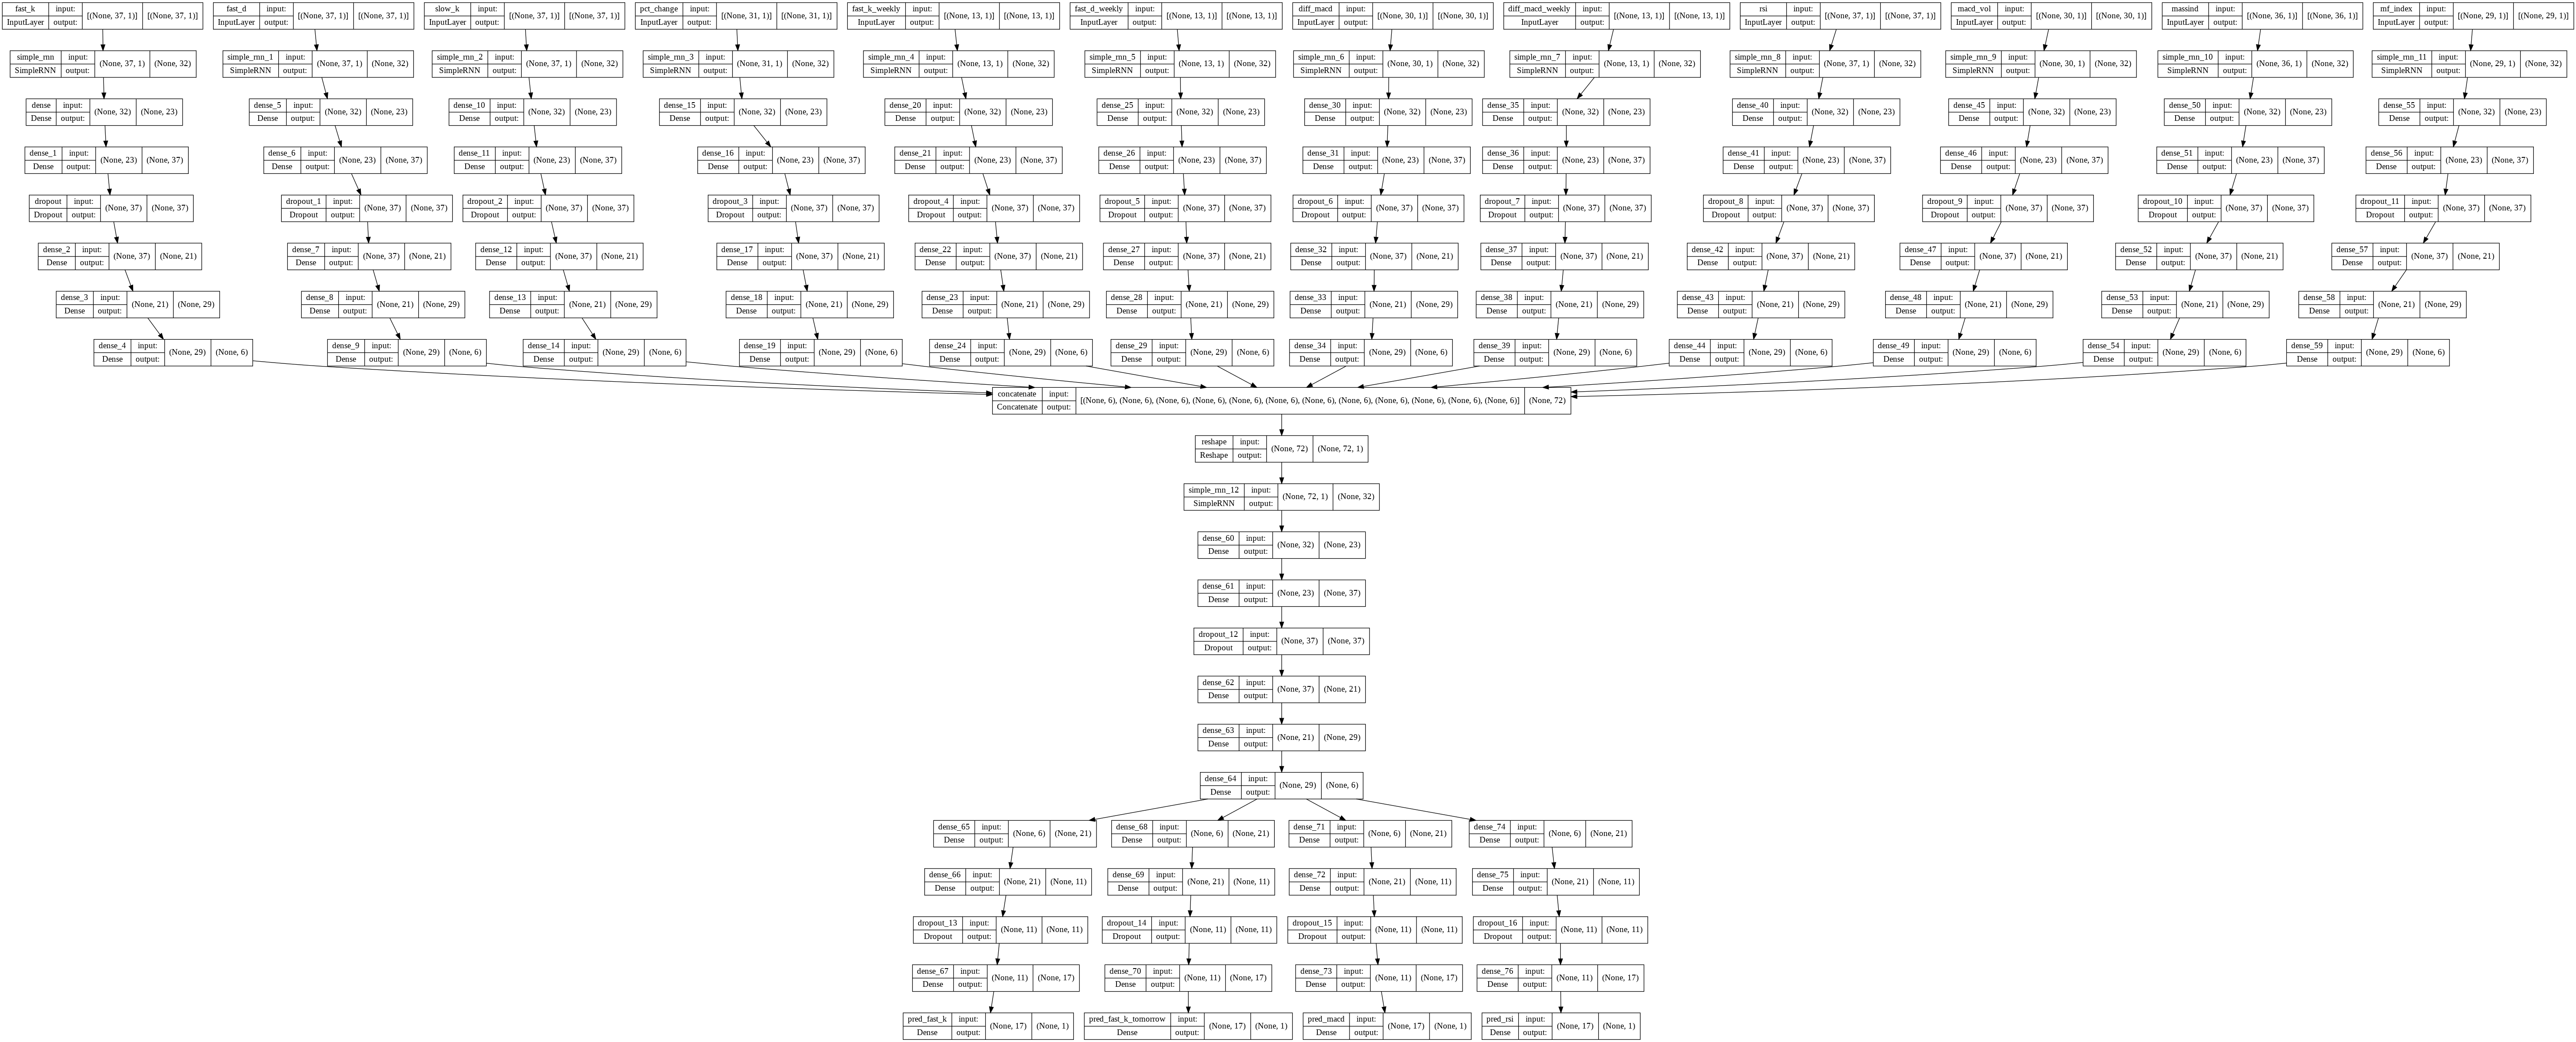

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png',
                          show_shapes=True,
                          # show_layer_activations=True
                          )

**Model Architecture Observations**

> Our Time Hyper Feature model has 12 intake deep belief channels, each taken in a different representation of price in the form of a stock indicators such as MACD or RSI.  The channels combine in the 'head' channel following the oscillating style of a deep belief architecture.  
> 4 outputs split from the head for individual predictions of our **Main Target** the numerator of the fast stochastic and the 3 other price indcators help ensure we had enough errors to pass back into the network.
> + we are also using the tomorrow value of the **Main Target** under the theory that it could help stablize the networks predictions of today.  

## Compile

In [ ]:
eps = 600 # 600 epochs
lr = 1e-2 # learning rate of .01

In [ ]:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), #using mean absolute error as our loss
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=lr))# using the ada delta optimizer

## Fit

> Assiging the 12 inputs as a dictionary to attach each input to the name of the input layers
> + 4 outputs at given to the model in the same dictionary format

In [ ]:
history = model.fit({'fast_k':input_fast_k_train, 'fast_d':input_fast_d_train,
                     'slow_k':input_slow_k_train, 'pct_change':input_pct_change_train,
                     'fast_k_weekly':input_fast_k_weekly_train,
                     'fast_d_weekly':input_fast_d_weekly_train,
                     'diff_macd':input_diff_macd_train,
                     'diff_macd_weekly':input_diff_macd_weekly_train,
                     'rsi':input_rsi_train, 'macd_vol':input_macd_vol_train,
                     'massind':input_massind_train, 'mf_index':input_mf_index_train,
                     }, # assiging the 12 inputs as a dictionary
                    {'pred_fast_k':output_fast_k_train,
                     'pred_fast_k_tomorrow':output_fast_k_tomorrow_train,
                     'pred_macd':output_macd_train,
                     'pred_rsi':output_rsi_train},
                    validation_split=.1,
                    epochs=eps,
                    batch_size=512
                    )

Epoch 1/600
2/2 [==============================] - 19s 3s/step - loss: 1.9190 - pred_fast_k_loss: 0.6204 - pred_fast_k_tomorrow_loss: 0.6191 - pred_macd_loss: 0.1570 - pred_rsi_loss: 0.5225 - val_loss: 2.1753 - val_pred_fast_k_loss: 0.6392 - val_pred_fast_k_tomorrow_loss: 0.6308 - val_pred_macd_loss: 0.4305 - val_pred_rsi_loss: 0.4749
Epoch 2/600
2/2 [==============================] - 0s 199ms/step - loss: 1.9048 - pred_fast_k_loss: 0.6222 - pred_fast_k_tomorrow_loss: 0.6157 - pred_macd_loss: 0.1588 - pred_rsi_loss: 0.5080 - val_loss: 2.1708 - val_pred_fast_k_loss: 0.6393 - val_pred_fast_k_tomorrow_loss: 0.6307 - val_pred_macd_loss: 0.4302 - val_pred_rsi_loss: 0.4706
Epoch 3/600
2/2 [==============================] - 0s 214ms/step - loss: 1.9112 - pred_fast_k_loss: 0.6178 - pred_fast_k_tomorrow_loss: 0.6142 - pred_macd_loss: 0.1620 - pred_rsi_loss: 0.5172 - val_loss: 2.1664 - val_pred_fast_k_loss: 0.6395 - val_pred_fast_k_tomorrow_loss: 0.6307 - val_pred_macd_loss: 0.4301 - val_pred_rs

In [ ]:
score = model.evaluate({'fast_k':input_fast_k_test, 'fast_d':input_fast_d_test,
                     'slow_k':input_slow_k_test, 'pct_change':input_pct_change_test,
                     'fast_k_weekly':input_fast_k_weekly_test,
                     'fast_d_weekly':input_fast_d_weekly_test,
                     'diff_macd':input_diff_macd_test,
                     'diff_macd_weekly':input_diff_macd_weekly_test,
                     'rsi':input_rsi_test, 'macd_vol':input_macd_vol_test,
                     'massind':input_massind_test, 'mf_index':input_mf_index_test
                     },# assiging the 12 inputs as a dictionary
                    {'pred_fast_k':output_fast_k_test,
                     'pred_fast_k_tomorrow':output_fast_k_tomorrow_test,
                     'pred_macd':output_macd_test,
                     'pred_rsi':output_rsi_test} # giving targets as a dictionary
                    )

9/9 [==============================] - 0s 24ms/step - loss: nan - pred_fast_k_loss: 0.1503 - pred_fast_k_tomorrow_loss: nan - pred_macd_loss: 0.2837 - pred_rsi_loss: 0.0817


In [ ]:
score[1]

0.15025313198566437

## save model

In [ ]:
model.save(f'/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/05. Deep Learning/04. stockmarket_timehyperfeature/timeseriesmodelmae{np.round(score[1],3)}_tomorrow{np.round(score[2],3)}_eps{eps}')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/05. Deep Learning/04. stockmarket_timehyperfeature/timeseriesmodelmae0.15_tomorrownan_eps600/assets


## plot history of all predictions

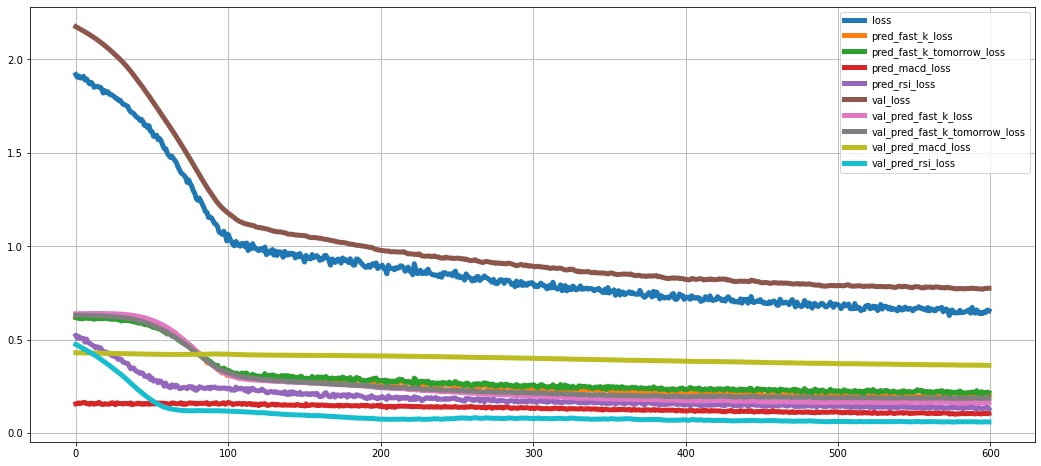

In [ ]:
pd.DataFrame(history.history).plot(figsize=(18,8), lw=5, grid=True)

## Plotting history of log loss.

Here we use take the log of the losses for comparison between the different values.

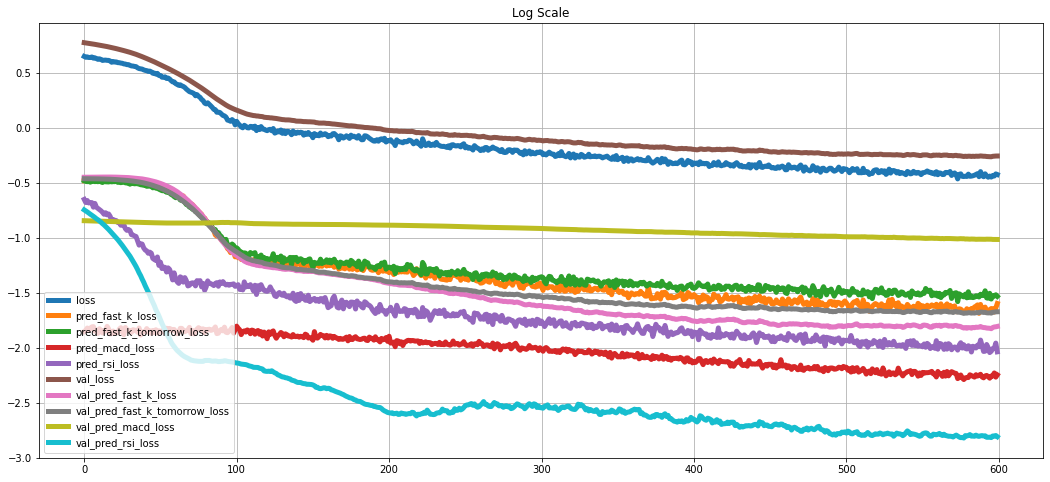

In [ ]:
np.log(pd.DataFrame(history.history)).plot(figsize=(18,8), lw=5, grid=True, title='Log Scale')

## Numerator of Fast Stochastic **Main Target** Loss training history

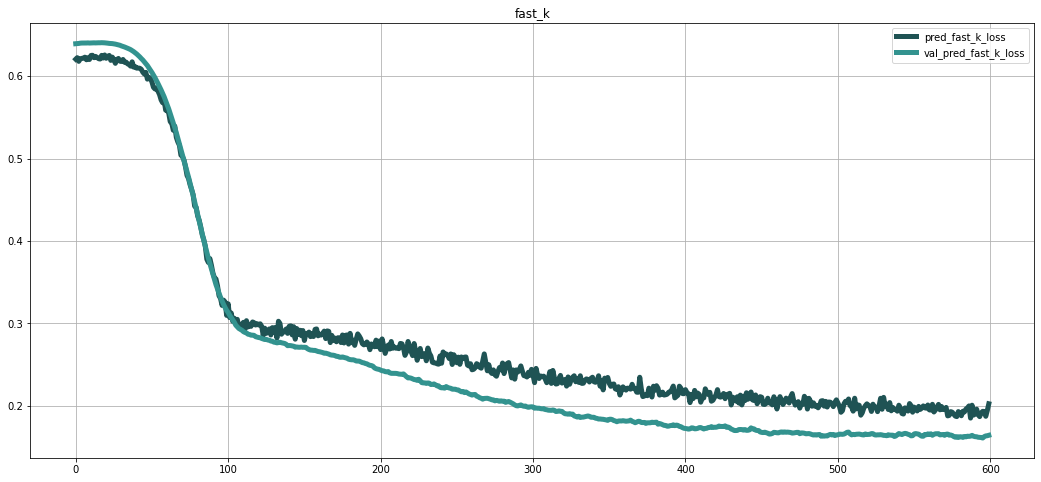

In [ ]:
ax = pd.DataFrame(history.history['pred_fast_k_loss']).plot(figsize=(18,8), lw=5, grid=True, title='fast_k',
                                                            color='#1F5354',label='pred_fast_k_loss')

pd.DataFrame(history.history['val_pred_fast_k_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='fast_k',
                                                           label='val_pred_fast_k_loss', ax=ax, legend=True)
plt.legend(['pred_fast_k_loss', 'val_pred_fast_k_loss'])

## Numerator of Fast Stochastic Tomorrow Loss training history

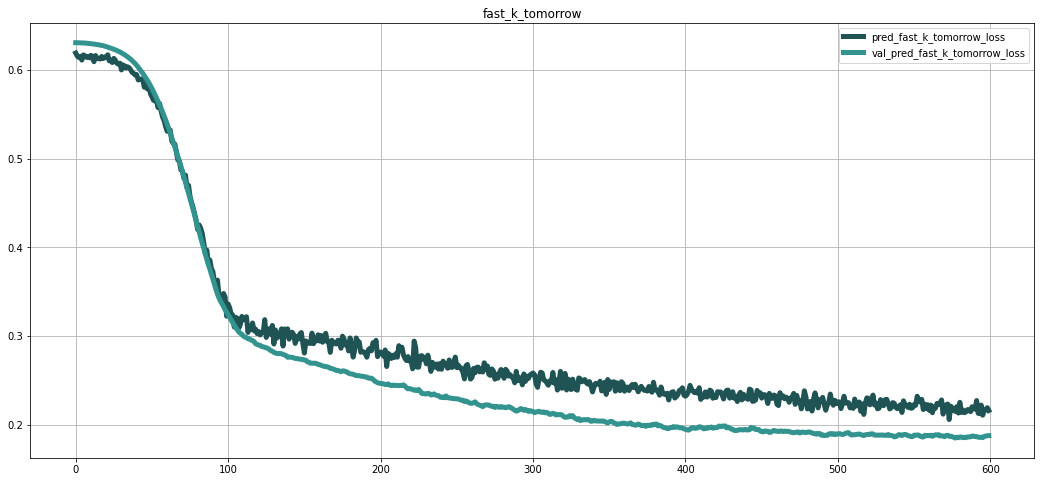

In [ ]:
ax = pd.DataFrame(history.history['pred_fast_k_tomorrow_loss']).plot(figsize=(18,8), lw=5, grid=True, title='fast_k_tomorrow',
                                                            color='#1F5354',label='pred_fast_k_tomorrow_loss')

pd.DataFrame(history.history['val_pred_fast_k_tomorrow_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='fast_k_tomorrow',
                                                           label='val_pred_fast_k_tomorrow_loss', ax=ax, legend=True)
plt.legend(['pred_fast_k_tomorrow_loss', 'val_pred_fast_k_tomorrow_loss'])

## MACD Loss training history

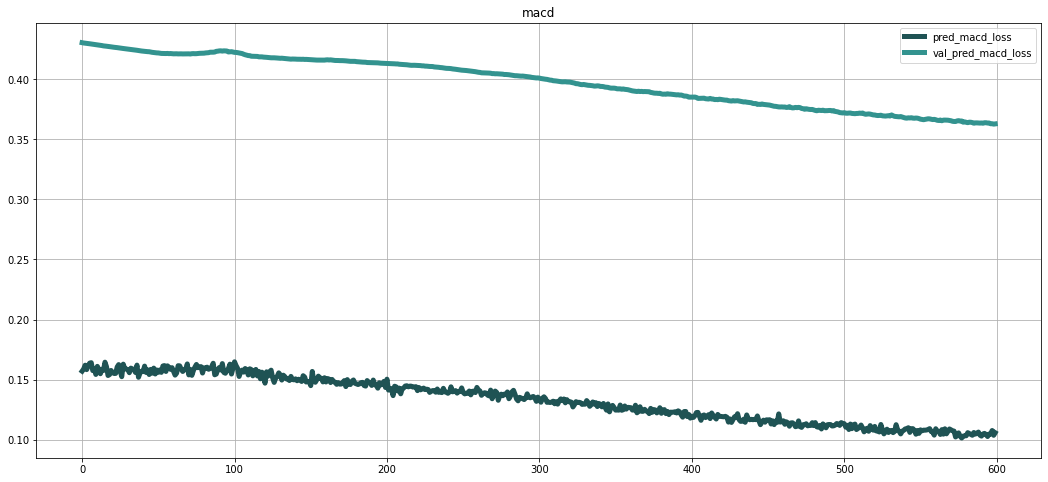

In [ ]:
ax = pd.DataFrame(history.history['pred_macd_loss']).plot(figsize=(18,8), lw=5, grid=True, title='macd',
                                                            color='#1F5354',label='pred_macd_loss')

pd.DataFrame(history.history['val_pred_macd_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='macd',
                                                           label='val_pred_macd_loss', ax=ax, legend=True)
plt.legend(['pred_macd_loss', 'val_pred_macd_loss'])

## RSI Loss training history

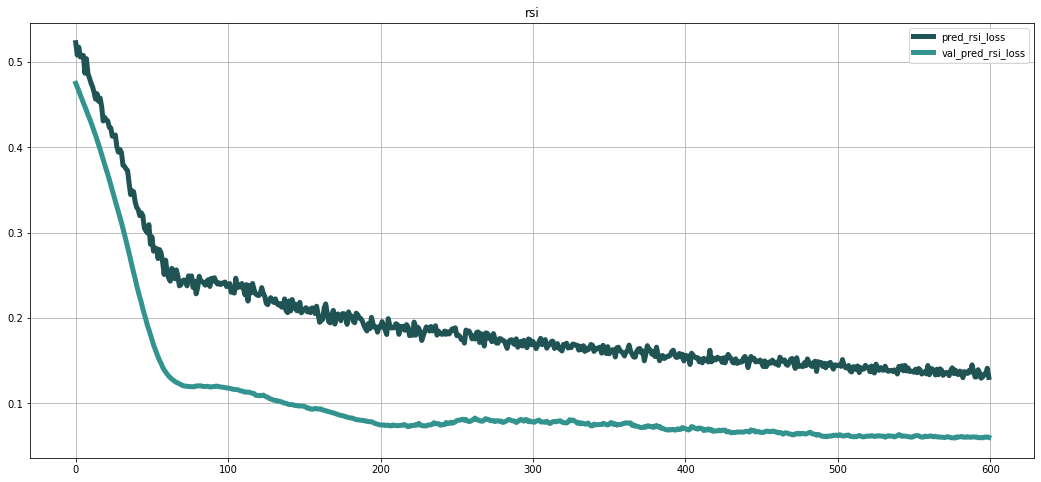

In [ ]:
ax = pd.DataFrame(history.history['pred_rsi_loss']).plot(figsize=(18,8), lw=5, grid=True, title='rsi',
                                                            color='#1F5354',label='pred_rsi_loss')

pd.DataFrame(history.history['val_pred_rsi_loss']).plot(figsize=(18,8), lw=5, grid=True,
                                                           color='#33938F',title='rsi',
                                                           label='val_pred_rsi_loss', ax=ax, legend=True)
plt.legend(['pred_rsi_loss', 'val_pred_rsi_loss'])

**Observations Training History**

> + All 4 indicators show relaive constant improvement over the 600 epochs
> + Hard to tell when overfitting occurs as our time series split results with the validation set ( most recent) start and for all 4 outputs maintain a lower loss but generally shows less but still slight decrease (improvement) over the 600 epochs as well
> + Our **Main Target** the numerator of the fast stochastic finishes with a validation loss of 0.18, although small our target is on a scale from 0.0 to 1.0 so 0.18 represents an average error of 18% up or down from our target prediction. Although this shows signs of capturing some information it is obvious that the historical price of a stock alone will not be able to reliably predict the market.

## Summary - Main Target

> + Our Main Target the numerator of the fast stochastic finishes with a validation loss of 0.18, although small our target is on a scale from 0.0 to 1.0 so 0.18 represents an average error of 18% up or down from our target prediction. Although this shows signs of capturing some information it is obvious that the historical price of a stock alone will not be able to reliably predict the market.
> + In conclusion we were not able to predict the stock price with only the historical price, however it seems that we were able to capture some information but not explain fully the price movements. This gives hope that we will be able to use our Time Series Hyperfeatures created here in our Meta Model.